In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import project1 as pj

from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler


In [3]:
def plot_bar_perform(perform, x_label, x_name=None, y_label=None, y_name=None, bar_label=None, y_range1=None, y_range2=None, x_range1=None, x_range2=None, leg_loc=None):
    location = np.arange(len(x_label))
    width = 0.35
    fig, ax = plt.subplots(layout='constrained')
    if x_range1 != None:
        fig.set_size_inches(x_range1, x_range2)
    for i, label in enumerate(bar_label):
        measurement = [round(perform[j][i], 3) for j in range(len(perform))]
        ax.bar(location + i * width, measurement, width, label=None)
        rects = ax.bar(location + i * width, measurement, width, label=label)
        ax.bar_label(rects, padding=3)
    ax.set_ylabel(f'{y_label}')
    ax.set_title(f'{y_name} vs. {x_name}')
    ax.set_xticks(location+0.175, x_label)
    if leg_loc == None:
        leg_loc = 'upper left'
    ax.legend(loc=leg_loc, ncols=3)
    ax.set_ylim(y_range1, y_range2)

    plt.show()

def plot_curve_perform(x_values, perform, x_label, y_label, x_name, y_range1=None, y_range2=None, x_range1=None, x_range2=None):
    fig, ax = plt.subplots(layout='constrained')
    if x_range1 != None:
        fig.set_size_inches(x_range1, x_range2)
    ax.plot(x_values, perform, marker='o', linestyle='-', color='b', label=f'{y_label}')
    for i, value in enumerate(perform):
        ax.text(x_values[i], value, round(value, 3), ha='center', va='bottom')
    plt.xscale('log')
    plt.ylabel(f'{y_label}')
    plt.xlabel(f'{x_name}')
    plt.title(f'{y_label} vs. {x_name}')
    plt.xticks(x_values, x_label)
    plt.ylim(y_range1,y_range2)
    plt.grid(True) 
    plt.legend()
    plt.show()

def plot_multi_curve_perform(x_values, train_perform, test_perform, y_label, x_label):
    plt.figure(figsize=(10, 6))
    train_perform0 = [p[0] for p in train_perform]
    train_perform1 = [p[1] for p in train_perform]
    test_perform0 = [p[0] for p in test_perform]
    test_perform1 = [p[1] for p in test_perform]
    plt.plot(x_values, train_perform0, label='train set class 0 '+f'{y_label}',  marker='o', color='blue')
    plt.plot(x_values, train_perform1, label='train set class 1 '+f'{y_label}',  marker='x', color='blue')
    plt.plot(x_values, test_perform0, label='test set class 0 '+f'{y_label}', marker='o', color='red')
    plt.plot(x_values, test_perform1, label='test set class 1 '+f'{y_label}', marker='x', color='red')
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.title(f'{y_label} vs. {x_label}')
    plt.xticks(x_values)
    plt.grid(True) 
    plt.legend()
    plt.show()


# **Linear Regression: Dataset1**
## *Fetch Data*

In [17]:
# Fetch dataset 1
infrared_thermography_temperature = fetch_ucirepo(id=925)
# Data (as pandas DataFrames) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 

## *Preprocessing*

In [18]:
# 1. Handle categorical features
categorical_columns= []
for column in X.columns:
    if X[column].dtype == 'object':
        categorical_columns.append(column)
X_encoded = pd.get_dummies(X, categorical_columns, drop_first=True)
feature_names = X_encoded.columns # save feature names for future use
# 2. Handling missing values
X_encoded.fillna(X_encoded.mean(), inplace=True)  
# 3. scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
y = y['aveOralM'].to_numpy()

## *Run Experiments*

* ## *Task 3.1:  Performance of Linear Regression*

In [28]:
x_train, x_test, y_train, y_test = pj.split_train_test_data(X_scaled, y, train_ratio=0.8, random_state=42)
variance_y = np.var(y_test)
print(f"Variance of target variable: {variance_y}")

# miniBatchSGD
linear_model = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True,
    epsilon=1e-7, 
    satisfied_stability=1e6
)
linear_model.fit(x_train, y_train, batch_size=16)
w_miniBatch = linear_model.w
print("weights:\n", w_miniBatch)

Variance of target variable: 0.21388186034217602
Mini-batch SGD completed in 1.339 seconds.
Iterations: 102000, Batch size: 16
weights:
 [ 3.70242860e+01 -9.47148262e-02  4.15816462e-04  3.56080825e-03
  2.25126721e-02 -2.17353626e-01 -8.43581109e-02  5.27318893e-03
 -5.24047811e-02 -4.76372127e-02  1.60697943e-01  5.02321191e-02
  1.27698817e-01  1.26179126e-01  5.89409065e-02  3.03912306e-03
 -7.63434297e-02  1.89954263e-02  6.58039740e-02 -5.52553079e-02
  1.03610248e-02 -6.84197574e-02 -1.12566735e-02 -4.69911960e-02
  5.57802943e-02 -7.34807516e-03  5.32552086e-02  5.14058109e-02
  2.77597310e-01  5.98503666e-03  6.75700942e-02 -2.42386153e-02
  5.50819059e-03  1.75482067e-02  3.59907037e-03 -4.73389706e-03
  9.08325981e-03  1.14644083e-02  7.51164597e-04 -6.66259503e-02
 -3.72715362e-02 -4.28451439e-02 -4.63726193e-02 -1.00212593e-01]


In [29]:
# Analytical Solution
linear_model2 = pj.LinearRegreassion(
    num_epochs=2000,
    use_miniBatch=False,
    with_bias=True,
    epsilon=1e-6, 
    satisfied_stability=1e6
)
linear_model2.fit(x_train, y_train)
w_analytical = linear_model2.w
print("weights:\n", w_analytical)

Analytical solution computed in 0.001 seconds.
weights:
 [ 3.70231742e+01 -9.56285778e-02  1.82869157e-03  3.56072021e-03
  2.23826537e-02 -2.31557590e-01 -5.97181894e-02  1.01798477e-02
 -6.13924929e-02 -6.67888462e-01  1.93652481e-01  6.22115567e-02
  7.09490262e-01  5.70743582e-01  5.10074047e-03 -7.73458660e-03
 -4.70024584e-01  2.06913085e-02  6.57049055e-02 -3.48131296e-01
  3.16115837e-01 -6.84263149e-02 -1.17078442e-02 -4.76868309e-02
  5.41152466e-02 -7.66399018e-03  5.27710024e-02  5.30480539e-02
  2.71523324e-01 -8.46517373e-02  1.62944307e-01 -2.39840967e-02
  4.88751623e-03  1.85029344e-02  3.29590639e-03 -5.55867924e-03
  9.61663214e-03  1.17121914e-02  6.07239307e-04 -6.60273912e-02
 -3.56121684e-02 -4.22411994e-02 -4.59875144e-02 -9.64338279e-02]


In [30]:
# add bias term
if linear_model.with_bias:
    x_test = linear_model.add_bias(x_test)
    x_train = linear_model.add_bias(x_train)


* **performance(MSE, MAE, R2-score): using miniBatchSGD**

In [31]:
""" Calculate MSE, R2 and MAE: miniBatchSGD """
print("Linear Regression miniBatch:\n")
# MSE
train_loss_LR_mini1 = linear_model.loss_function(x_train, y_train)
print(f"Training MSE: {train_loss_LR_mini1:.4f}")
test_loss_LR_mini1 = linear_model.loss_function(x_test, y_test)
print(f"Test MSE: {test_loss_LR_mini1:.4f}")

y_train_pred_miniLR = linear_model.predict(x_train)
y_test_pred_miniLR = linear_model.predict(x_test)
tr_r2_LR_mini, tr_mae_LR_mini, tst_r2_LR_mini, tst_mae_LR_mini = pj.performance_linear(y_train, y_test, y_train_pred_miniLR, y_test_pred_miniLR)

Linear Regression miniBatch:

Training MSE: 0.0597
Test MSE: 0.0738
Train set:
MAE: 0.1929, R2: 0.7793 
Test set:
MAE: 0.2047, R2: 0.6551


* **performance(MSE, MAE, R2-score): using analytical solution**

In [277]:
""" Calculate MSE, R2 and MAE: analytical solution """
# MSE
print("Linear Regression analytical:\n")
train_loss_LR_a = linear_model2.loss_function(x_train, y_train)
print(f"Training MSE: {train_loss_LR_a:.4f}")
test_loss_LR_a = linear_model2.loss_function(x_test, y_test)
print(f"Test MSE: {test_loss_LR_a:.4f}")

y_train_pred_analytical = linear_model2.predict(x_train) 
y_test_pred_analytical = linear_model2.predict(x_test)
tr_r2_LR_a, tr_mae_LR_a, tst_r2_LR_a, tst_mae_LR_a = pj.performance_linear(y_train, y_test, y_train_pred_analytical, y_test_pred_analytical)

Linear Regression analytical:

Training MSE: 0.0594
Test MSE: 0.0753
Train set:
MAE: 0.1931, R2: 0.7804 
Test set:
MAE: 0.2077, R2: 0.6481


* ## *Task 3.2: report weights of each faeture*

* **weights: using miniBatchSGD**

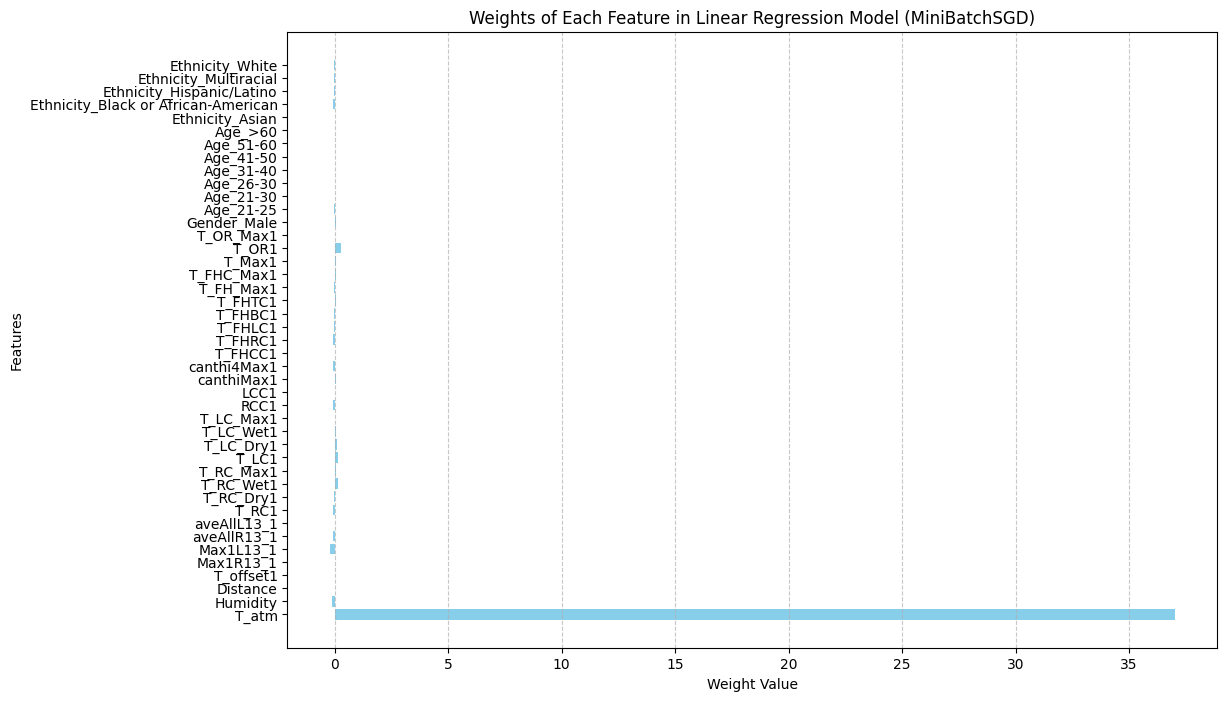

In [278]:
title = 'Weights of Each Feature in Linear Regression Model (MiniBatchSGD)'
pj.w_plot(feature_names, w_miniBatch, title)

* **weights: using analytical solution**

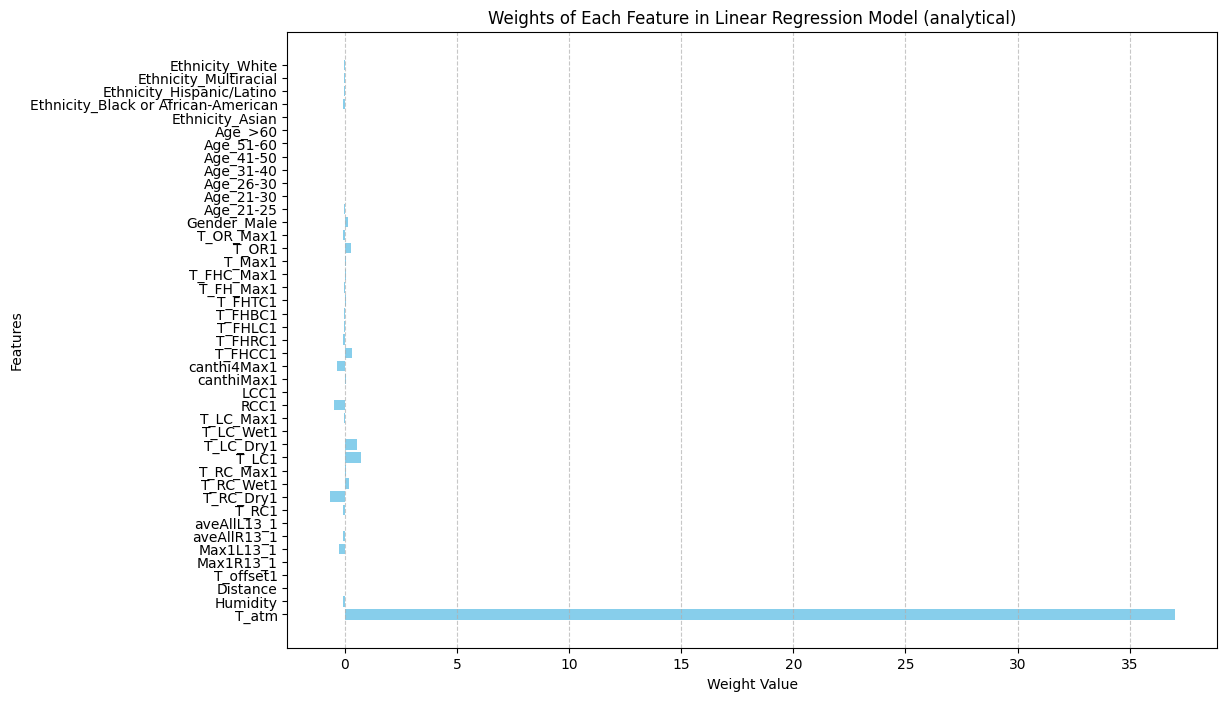

In [279]:
title = 'Weights of Each Feature in Linear Regression Model (analytical)'
pj.w_plot(feature_names, w_analytical, title)

* ## *Task 3.3: how does training set size affects the performance*

* **performance(MSE, MAE, R2-score): using miniBatchSGD**

In [280]:
# miniBatch
split_ratio = [20,30,40,50,60,70,80]
batch_sizes = [16]
tr_mse_sr, tst_mse_sr, tr_r2_sr, tr_mae_sr, tst_r2_sr, tst_mae_sr, grad_norm_histLR_sr = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model, batch_sizes, linear=True)

Mini-batch SGD completed in 0.368 seconds.
Iterations: 26000, Batch size: 16
Train set:
MAE: 0.1667, R2: 0.7911 
Test set:
MAE: 0.2558, R2: -4.4999
Mini-batch SGD completed in 0.551 seconds.
Iterations: 40000, Batch size: 16
Train set:
MAE: 0.1725, R2: 0.8303 
Test set:
MAE: 0.2139, R2: 0.6938
Mini-batch SGD completed in 0.689 seconds.
Iterations: 52000, Batch size: 16
Train set:
MAE: 0.1762, R2: 0.8007 
Test set:
MAE: 0.2125, R2: 0.7137
Mini-batch SGD completed in 0.864 seconds.
Iterations: 64000, Batch size: 16
Train set:
MAE: 0.1831, R2: 0.7731 
Test set:
MAE: 0.2091, R2: 0.7305
Mini-batch SGD completed in 1.048 seconds.
Iterations: 78000, Batch size: 16
Train set:
MAE: 0.1928, R2: 0.7587 
Test set:
MAE: 0.2143, R2: 0.7345
Mini-batch SGD completed in 1.219 seconds.
Iterations: 90000, Batch size: 16
Train set:
MAE: 0.1900, R2: 0.7586 
Test set:
MAE: 0.2150, R2: 0.7499
Mini-batch SGD completed in 1.419 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1929, R2: 0.7793 
Tes

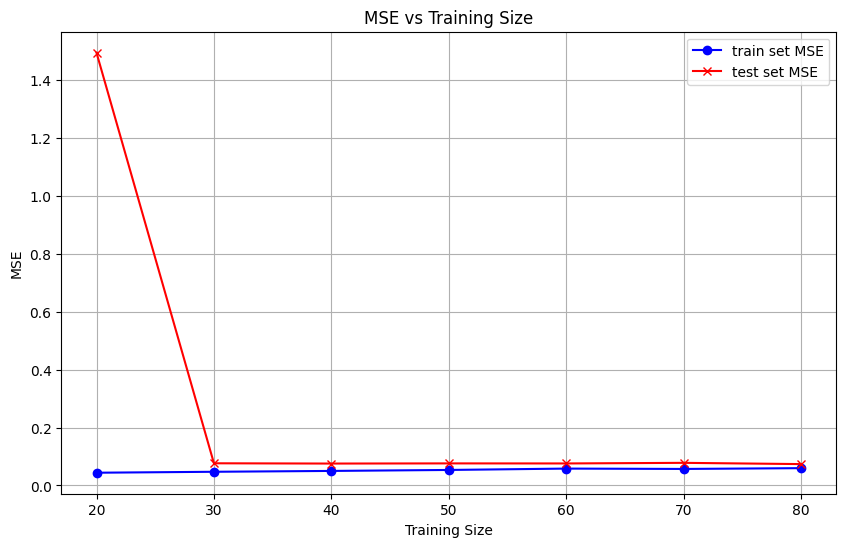

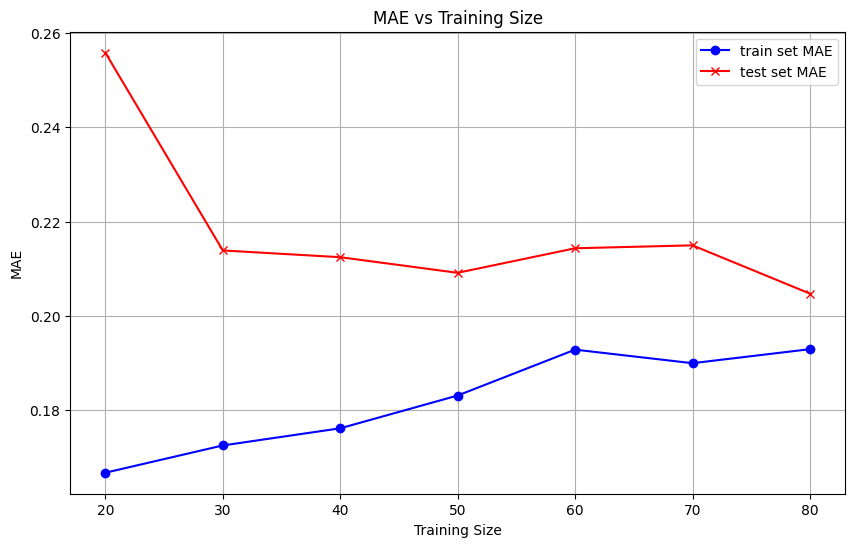

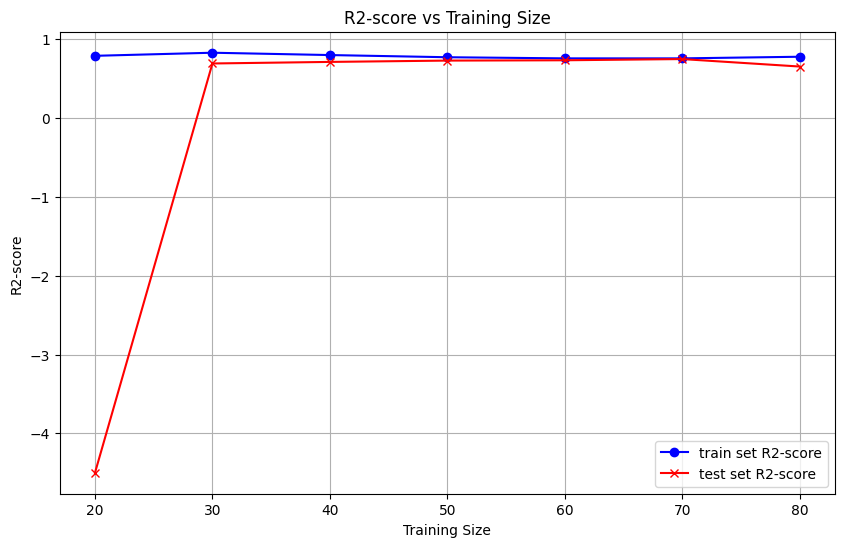

In [281]:
# plot
x_label = 'Training Size'
label = 'MSE'
pj.size_plot(split_ratio, tr_mse_sr, tst_mse_sr, label, x_label)

label = 'MAE'
pj.size_plot(split_ratio, tr_mae_sr, tst_mae_sr, label, x_label)

label = 'R2-score'
pj.size_plot(split_ratio, tr_r2_sr, tst_r2_sr, label, x_label)


* **performance(MSE, MAE, R2-score): using analytical solution**

In [282]:
# analytical solution
tr_mse_a, tst_mse_a, tr_r2_a, tr_mae_a, tst_r2_a, tst_mae_a, grad_norm_histLR_a = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model2, batch_sizes, linear=True)

Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1590, R2: 0.8064 
Test set:
MAE: 0.2223, R2: 0.6594
Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1686, R2: 0.8371 
Test set:
MAE: 0.2177, R2: 0.6797
Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1739, R2: 0.8049 
Test set:
MAE: 0.2165, R2: 0.7067
Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1821, R2: 0.7756 
Test set:
MAE: 0.2107, R2: 0.7303
Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1868, R2: 0.7708 
Test set:
MAE: 0.2096, R2: 0.7357
Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1876, R2: 0.7620 
Test set:
MAE: 0.2139, R2: 0.7456
Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1931, R2: 0.7804 
Test set:
MAE: 0.2077, R2: 0.6481


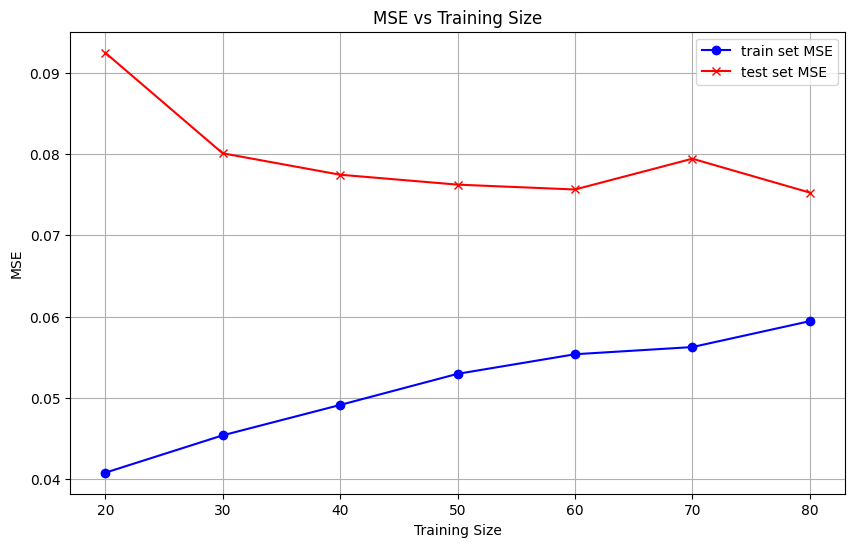

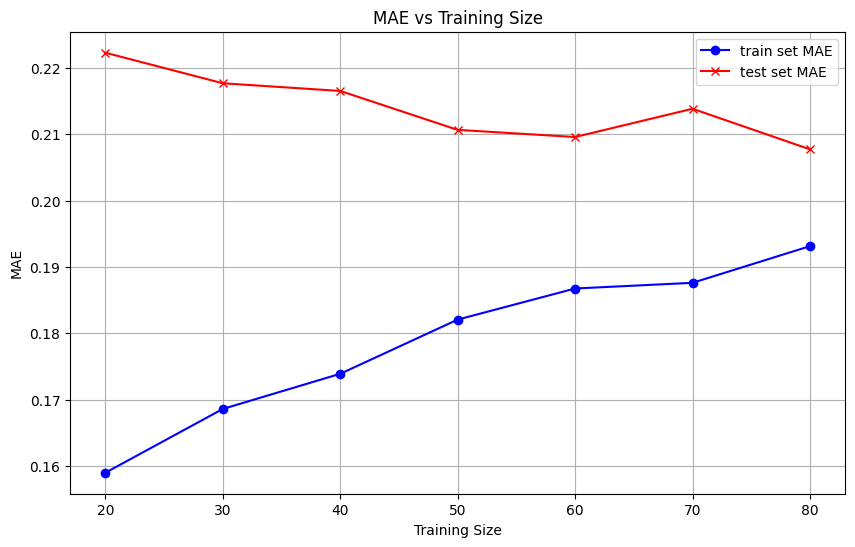

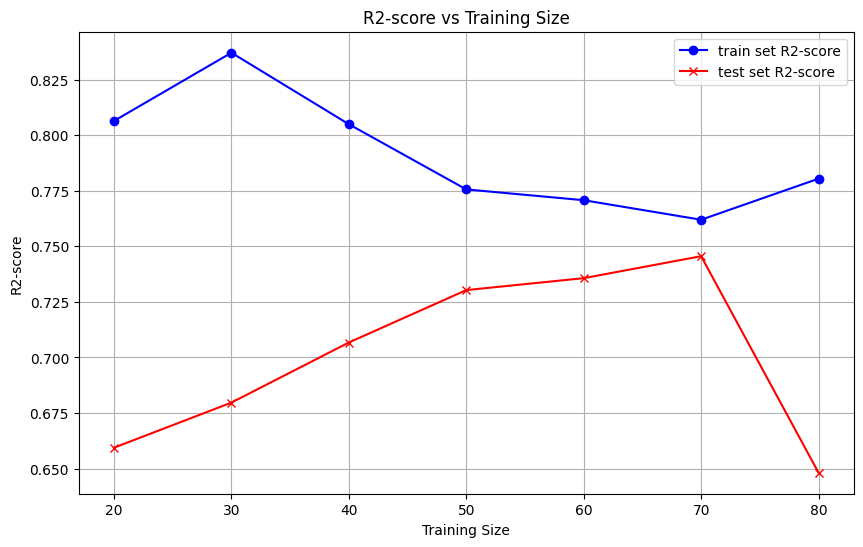

In [283]:
# plot
x_label = 'Training Size'
label = 'MSE'
pj.size_plot(split_ratio, tr_mse_a, tst_mse_a, label, x_label)

label = 'MAE'
pj.size_plot(split_ratio, tr_mae_a, tst_mae_a, label, x_label)

label = 'R2-score'
pj.size_plot(split_ratio, tr_r2_a, tst_r2_a, label, x_label)

* ## *Task 3.4: how does batch size affects the model's behaviors*
    *(convergence speed and peformance)*

In [284]:
split_ratio = [80]
batch_sizes = [8, 16, 32, 128, 256, 512, X_scaled.shape[0]]
linear_model.time_hist.clear()
tr_mse_bs, tst_mse_bs, tr_r2_bs, tr_mae_bs, tst_r2_bs, tst_mae_bs, grad_norm_histLR_bs = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model, batch_sizes, linear=True)

Mini-batch SGD completed in 2.657 seconds.
Iterations: 204000, Batch size: 8
Train set:
MAE: 0.1944, R2: 0.7787 
Test set:
MAE: 0.2098, R2: 0.6482
Mini-batch SGD completed in 1.367 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1928, R2: 0.7790 
Test set:
MAE: 0.2041, R2: 0.6542
Mini-batch SGD completed in 0.727 seconds.
Iterations: 52000, Batch size: 32
Train set:
MAE: 0.1928, R2: 0.7778 
Test set:
MAE: 0.2031, R2: 0.6549
Mini-batch SGD completed in 0.27 seconds.
Iterations: 14000, Batch size: 128
Train set:
MAE: 0.1940, R2: 0.7790 
Test set:
MAE: 0.2055, R2: 0.6534
Mini-batch SGD completed in 0.198 seconds.
Iterations: 8000, Batch size: 256
Train set:
MAE: 0.1936, R2: 0.7779 
Test set:
MAE: 0.2030, R2: 0.6560
Mini-batch SGD completed in 0.139 seconds.
Iterations: 4000, Batch size: 512
Train set:
MAE: 0.1947, R2: 0.7779 
Test set:
MAE: 0.2064, R2: 0.6512
Mini-batch SGD completed in 0.115 seconds.
Iterations: 2000, Batch size: 1020
Train set:
MAE: 0.1953, R2: 0.7762 
Tes

* **Convergence Speed: Observe changes in training time**

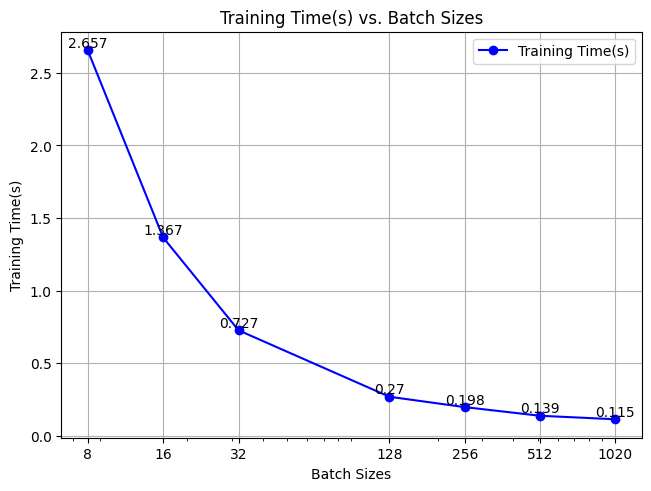

In [286]:
x_label = ["8", "16", "32", "128", "256", "512", "1020"]
x_name = 'Batch Sizes'
plot_curve_perform(batch_sizes, linear_model.time_hist, x_label, 'Training Time(s)', x_name)

* **Batch size vs. Performance (MSE, MAE, R2-score)**

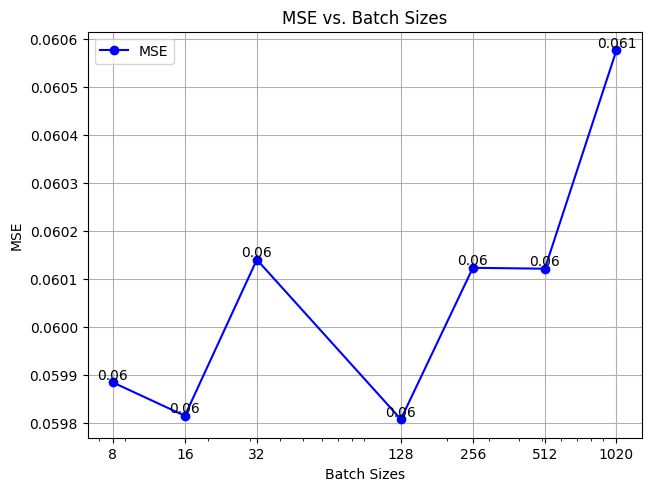

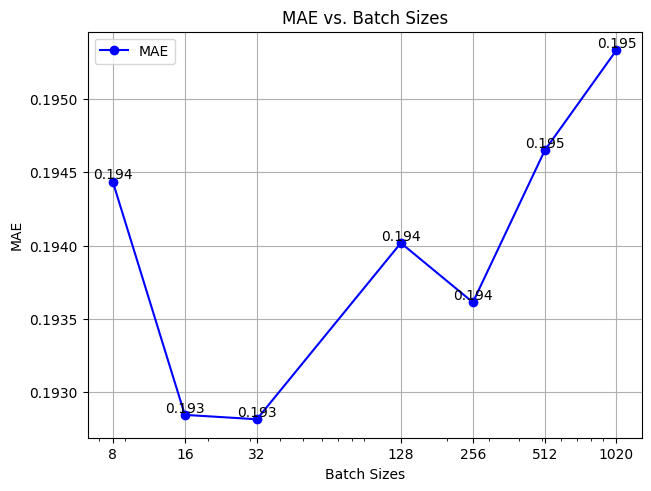

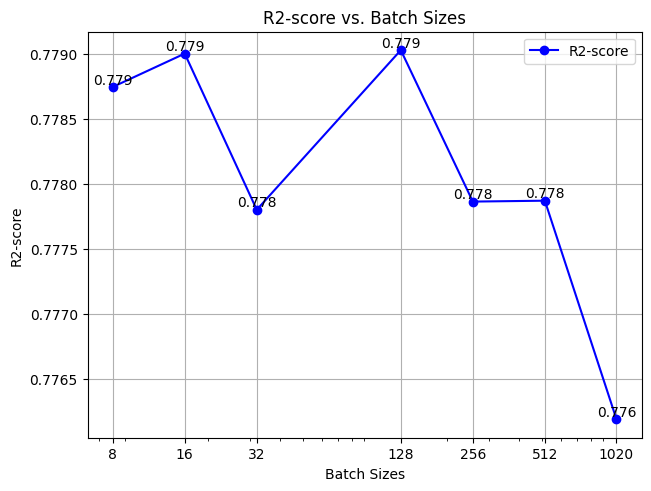

In [287]:
plot_curve_perform(batch_sizes, tr_mse_bs, x_label, 'MSE', x_name)
plot_curve_perform(batch_sizes, tr_mae_bs, x_label, 'MAE', x_name)
plot_curve_perform(batch_sizes, tr_r2_bs, x_label, 'R2-score', x_name)

* ## *Task 3.5: model's performance with differnt learning rate*

* **using miniBatchSGD:**

*   **learning rate = 1e-4**

In [288]:
# miniBatchSGD
linear_model_lr1 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-4,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr1.time_hist.clear()
tr_mse_lr1, tst_mse_lr1, tr_r2_lr1, tr_mae_lr1, tst_r2_lr1, tst_mae_lr1, grad_norm_histLR_lr1 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr1, batch_sizes, linear=True)

Mini-batch SGD completed in 1.398 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.2080, R2: 0.7432 
Test set:
MAE: 0.2291, R2: 0.5908


* **learning rate = 1e-3**

In [289]:
# miniBatchSGD
linear_model_lr2 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-3,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr2.time_hist.clear()
tr_mse_lr2, tst_mse_lr2, tr_r2_lr2, tr_mae_lr2, tst_r2_lr2, tst_mae_lr2, grad_norm_histLR_lr2 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr2, batch_sizes, linear=True)

Mini-batch SGD completed in 1.382 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1940, R2: 0.7788 
Test set:
MAE: 0.2063, R2: 0.6517


* **learning rate = 1e-2**

In [290]:
# miniBatchSGD
linear_model_lr3 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr3.time_hist.clear()
tr_mse_lr3, tst_mse_lr3, tr_r2_lr3, tr_mae_lr3, tst_r2_lr3, tst_mae_lr3, grad_norm_histLR_lr3 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr3, batch_sizes, linear=True)

Mini-batch SGD completed in 1.373 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1932, R2: 0.7796 
Test set:
MAE: 0.2055, R2: 0.6539


* **learning rate = 2e-2**

In [291]:
# miniBatchSGD
linear_model_lr4 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=2e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr4.time_hist.clear()
tr_mse_lr4, tst_mse_lr4, tr_r2_lr4, tr_mae_lr4, tst_r2_lr4, tst_mae_lr4, grad_norm_histLR_lr4 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr4, batch_sizes, linear=True)

Mini-batch SGD completed in 1.383 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.1945, R2: 0.7787 
Test set:
MAE: 0.2099, R2: 0.6475


* **learning rate = 3e-2**

In [292]:
# miniBatchSGD
linear_model_lr5 = pj.LinearRegreassion(
    num_epochs=2000,
    lr=3e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=True,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr5.time_hist.clear()
tr_mse_lr5, tst_mse_lr5, tr_r2_lr5, tr_mae_lr5, tst_r2_lr5, tst_mae_lr5, grad_norm_histLR_lr5 = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr5, batch_sizes, linear=True)

Mini-batch SGD completed in 1.379 seconds.
Iterations: 102000, Batch size: 16
Train set:
MAE: 0.6428, R2: -134.4791 
Test set:
MAE: 0.4510, R2: -0.8771


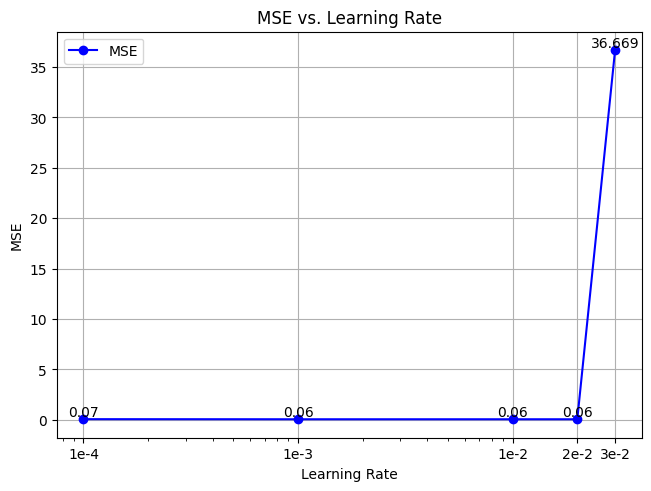

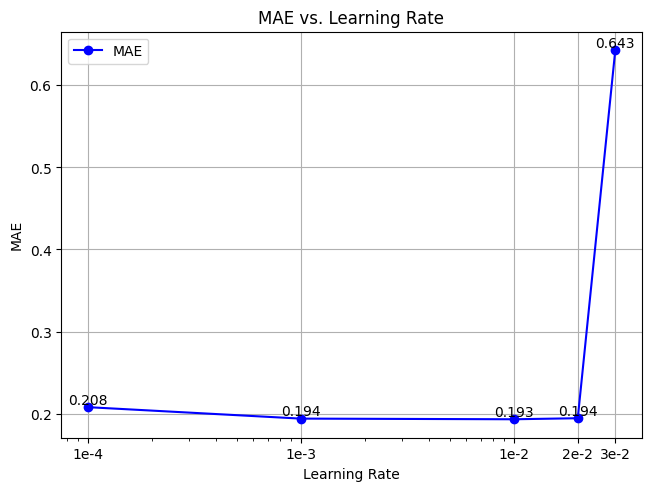

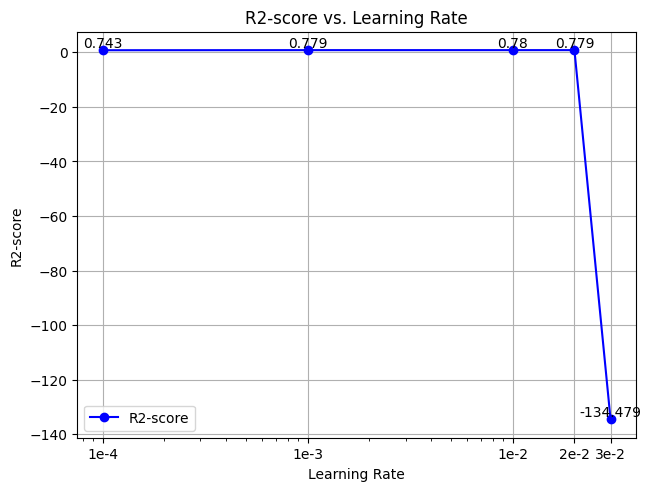

In [293]:
lr = ["1e-4", "1e-3","1e-2", "2e-2", "3e-2"]
lr_value = [1e-4, 1e-3, 1e-2, 2e-2, 3e-2]
x_name = 'Learning Rate'
mse = [tr_mse_lr1[0],tr_mse_lr2[0], tr_mse_lr3[0], tr_mse_lr4[0], tr_mse_lr5[0]]
plot_curve_perform(lr_value, mse, lr, 'MSE', x_name)
mae = [tr_mae_lr1[0],tr_mae_lr2[0], tr_mae_lr3[0], tr_mae_lr4[0], tr_mae_lr5[0]]
plot_curve_perform(lr_value, mae, lr, 'MAE', x_name)
r2 = [tr_r2_lr1[0],tr_r2_lr2[0], tr_r2_lr3[0], tr_r2_lr4[0], tr_r2_lr5[0]]
plot_curve_perform(lr_value, r2, lr, 'R2-score', x_name)


* **using analitical solution:**

* **learning rate = 1e-10**

In [294]:
# miniBatchSGD
linear_model_lr1a = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-10,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=False,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr1a.time_hist.clear()
tr_mse_lr1a, tst_mse_lr1a, tr_r2_lr1a, tr_mae_lr1a, tst_r2_lr1a, tst_mae_lr1a, grad_norm_histLR_lr1a = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr1a, batch_sizes, linear=True)

Analytical solution computed in 0.009 seconds.
Train set:
MAE: 0.1931, R2: 0.7804 
Test set:
MAE: 0.2077, R2: 0.6481


* **learning rate = 1e-2**

In [295]:
# miniBatchSGD
linear_model_lr2a = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=False,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr2a.time_hist.clear()
tr_mse_lr2a, tst_mse_lr2a, tr_r2_lr2a, tr_mae_lr2a, tst_r2_lr2a, tst_mae_lr2a, grad_norm_histLR_lr2a = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr2a, batch_sizes, linear=True)

Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1931, R2: 0.7804 
Test set:
MAE: 0.2077, R2: 0.6481


* **learning rate = 1000**

In [296]:
# miniBatchSGD
linear_model_lr3a = pj.LinearRegreassion(
    num_epochs=2000,
    lr=1000,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.3,
    use_miniBatch=False,
    with_bias=True
)

split_ratio = [80]
batch_sizes = [16]
linear_model_lr3a.time_hist.clear()
tr_mse_lr3a, tst_mse_lr3a, tr_r2_lr3a, tr_mae_lr3a, tst_r2_lr3a, tst_mae_lr3a, grad_norm_histLR_lr3a = pj.size_vs_performance(X_scaled, y, split_ratio, linear_model_lr3a, batch_sizes, linear=True)

Analytical solution computed in 0.0 seconds.
Train set:
MAE: 0.1931, R2: 0.7804 
Test set:
MAE: 0.2077, R2: 0.6481


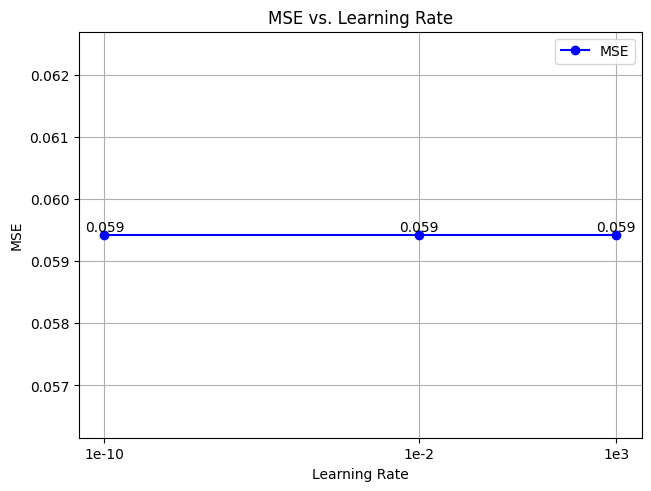

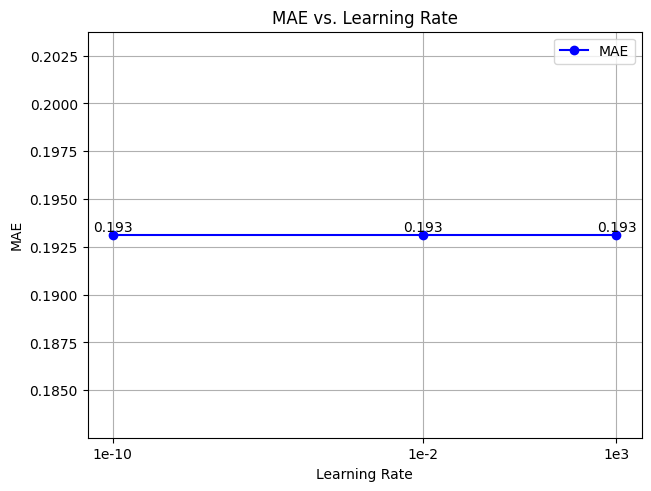

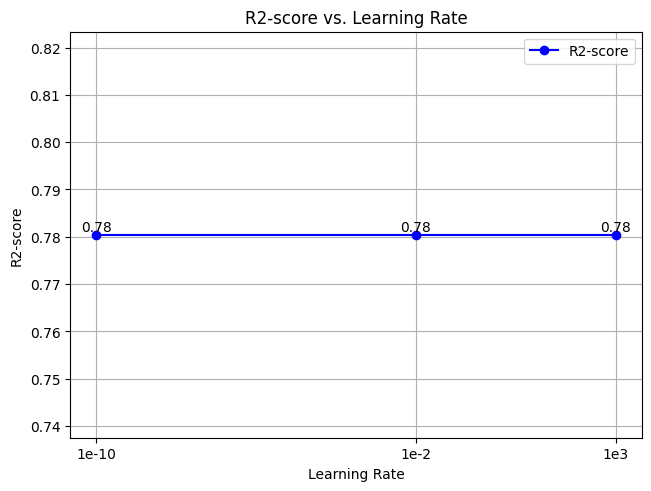

In [297]:
lr = ["1e-10","1e-2", "1e3"]
lr_value = [1e-10, 1e-2, 1e3]
mse_a = [tr_mse_lr1a[0],tr_mse_lr2a[0], tr_mse_lr3a[0]]
plot_curve_perform(lr_value, mse_a, lr, 'MSE', x_name)
mae_a = [tr_mae_lr1a[0],tr_mae_lr2a[0], tr_mae_lr3a[0]]
plot_curve_perform(lr_value, mae_a, lr, 'MAE', x_name)
r2_a = [tr_r2_lr1a[0],tr_r2_lr2a[0], tr_r2_lr3a[0]]
plot_curve_perform(lr_value, r2_a, lr, 'R2-score', x_name)

* ## *Task 3.6: compare analytical solution based and miniBatchSGD based linear regressions*

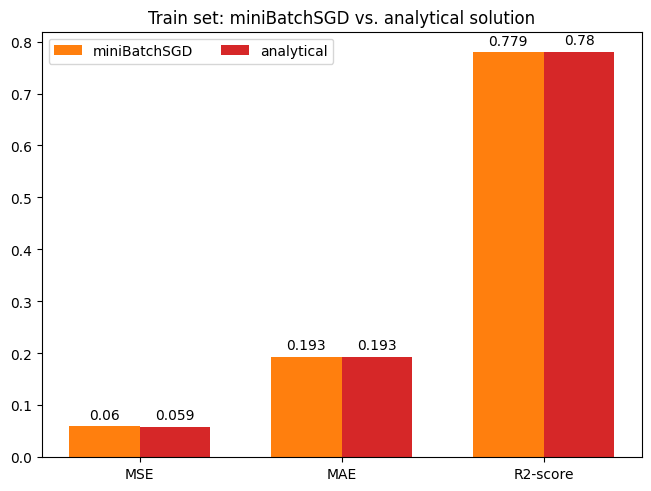

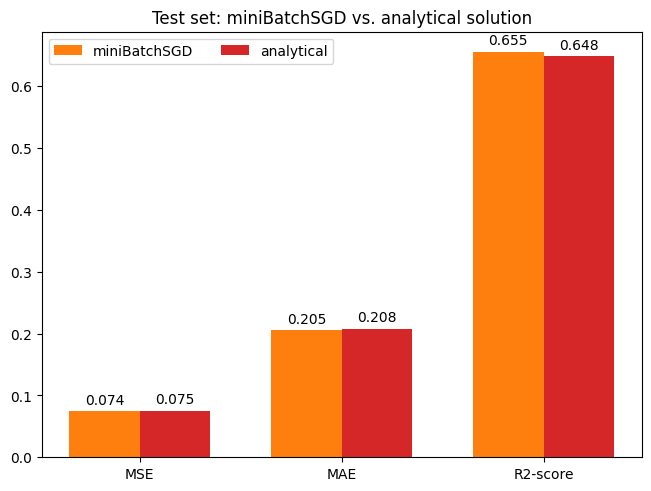

In [298]:
MSE_train = [train_loss_LR_mini1, train_loss_LR_a]
MAE_train = [tr_mae_LR_mini, tr_mae_LR_a]
R2_train = [tr_r2_LR_mini, tr_r2_LR_a]
perform_train = [MSE_train, MAE_train, R2_train]
x_label = ["MSE", "MAE", "R2-score"]
x_name = "analytical solution"
y_name = 'Train set: miniBatchSGD'
bar_label = ["miniBatchSGD", "analytical"]

plot_bar_perform(perform_train, x_label, x_name, "", y_name, bar_label)

MSE_test = [test_loss_LR_mini1, test_loss_LR_a]
MAE_test = [tst_mae_LR_mini, tst_mae_LR_a]
R2_test = [tst_r2_LR_mini, tst_r2_LR_a]
perform_test = [MSE_test, MAE_test, R2_test]
y_name = 'Test set: miniBatchSGD'

plot_bar_perform(perform_test, x_label, x_name, "", y_name, bar_label)

# **Logistic Classification: Dataset2**
## *Fetch Data*

In [4]:
# Fetch dataset 2
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
# data (as pandas dataframes) 
X_log = cdc_diabetes_health_indicators.data.features 
y_log = cdc_diabetes_health_indicators.data.targets 

# Check unique values in the target variable
unique_classes = np.unique(y_log)
num_classes = len(unique_classes)

print(f"Unique classes in the target variable: {unique_classes}")
print(f"Number of classes: {num_classes}")


Unique classes in the target variable: [0 1]
Number of classes: 2


## *Preprocessing*

In [5]:
# 1. Handle categorical features
categorical_columns_log= []
for column_log in X_log.columns:
    if X_log[column_log].dtype == 'object':
        categorical_columns_log.append(column_log)
X_encoded_log = pd.get_dummies(X_log, categorical_columns_log, drop_first=True)
feature_names_log = X_encoded_log.columns # save feature names for future use
# 2. Handling missing values
X_encoded_log.fillna(X_encoded_log.mean(), inplace=True)  
# 3. scaling features
scaler_log = StandardScaler()
X_scaled_log = scaler_log.fit_transform(X_encoded_log) # feature transformation technique
y_log = y_log['Diabetes_binary'].to_numpy()
# slove dataset imbalance problem
X_scaled_log, y_log = pj.generate_synthetic_samples(X_scaled_log, y_log)
# X_scaled_log, y_log = pj.generate_synthetic_samples(X_scaled_log, y_log)
X_scaled_log, y_log = pj.generate_synthetic_samples(X_scaled_log, y_log)


## *Run Experiments*

* ## *Task 3.1:  Performance of Logistic Regression*

In [301]:
x_train_log, x_test_log, y_train_log, y_test_log = pj.split_train_test_data(X_scaled_log, y_log, train_ratio=0.8, random_state=42)
y_train_log = y_train_log.flatten()  # avoid shape mismatches
y_test_log = y_test_log.flatten()

# miniBatchSGD
logistic_model_log = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=100,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
logistic_model_log.fit(x_train_log, y_train_log, batch_size=16) 
w_log_miniBatch = logistic_model_log.w
print("weights:\n", w_log_miniBatch)


miniBatchSGD completed in 38.078 seconds.
Iterations: 1798600, Batch size: 16
weights:
 [-1.26461736  0.44393616  0.36868688  0.25131902  0.64592325 -0.04188398
  0.0723465   0.1284438  -0.01883639 -0.01824698 -0.01781256 -0.21919006
  0.04014767  0.01335017  0.69475735 -0.0408948  -0.0200081   0.06370828
  0.15796683  0.47248176 -0.04780429 -0.17440486]


In [302]:
# full batch
logistic_model_log2 = pj.LogisticRegression(    
    boundary=0.5,
    num_epochs=500,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=False,
    with_bias=True
)
logistic_model_log2.fit(x_train_log, y_train_log)
w_log_full = logistic_model_log2.w  # Exclude the bias term
print("weights:\n", w_log_full)


full batch completed in 25.86 seconds.
Iterations: 500
weights:
 [-0.48825318  0.28316081  0.21782763  0.08385803  0.27950098  0.01703566
  0.07296443  0.14620938 -0.05981394 -0.01711128 -0.02705069 -0.08032814
  0.03093338  0.00240587  0.29785589  0.00386307  0.08591414  0.14292781
  0.06279123  0.19714272 -0.07883056 -0.11002777]


In [303]:
# add bias term
if logistic_model_log.with_bias:
    x_test_log = logistic_model_log.add_bias(x_test_log)
    x_train_log = logistic_model_log.add_bias(x_train_log)

* **performance(loss, accuracy, precision, recall, f1-score): using miniBatchSGD**

In [304]:
""" Calculate loss, accuracy, precision, recall and f1-score: miniBatch """
# loss
print("Logistic Regression miniBatch:\n")
train_loss_log = logistic_model_log.loss_function(x_train_log, y_train_log)
print(f"Training MSE: {train_loss_log:.4f}")
test_loss_log = logistic_model_log.loss_function(x_test_log, y_test_log)
print(f"Test MSE: {test_loss_log:.4f}")

y_train_pred_miniLog = logistic_model_log.predict(x_train_log)
y_test_pred_miniLog = logistic_model_log.predict(x_test_log)
class_label = [0,1]
train_accuracy_miniLog, train_precision_miniLog, train_recall_miniLog, train_f1_miniLog, test_accuracy_miniLog, test_precision_miniLog, test_recall_miniLog, test_f1_miniLog = pj.performance_log(y_train_log, y_train_pred_miniLog, y_test_log, y_test_pred_miniLog, class_label)


Logistic Regression miniBatch:

Training MSE: 0.4755
Test MSE: 0.4786
Train set:
accuracy: 0.7692, precision: ['0.8099', '0.7065'], recall: ['0.8099', '0.7065'], f1-score: ['0.8099', '0.7065'], 
Test set:
accuracy: 0.7676, precision: ['0.8090', '0.7039'], recall: ['0.8080', '0.7052'], f1-score: ['0.8085', '0.7045']


* **performance(loss, accuracy, precision, recall, f1-score): using full batch**

In [305]:
""" Calculate loss, accuracy, precision, recall and f1-score: full batch """
# loss
print("Logistic Regression full batch:\n")
train_loss_log2 = logistic_model_log2.loss_function(x_train_log, y_train_log)
print(f"Training MSE: {train_loss_log2:.4f}")
test_loss_log2 = logistic_model_log2.loss_function(x_test_log, y_test_log)
print(f"Test MSE: {test_loss_log2:.4f}")

y_train_pred_fullLog = logistic_model_log2.predict(x_train_log)
y_test_pred_fullLog = logistic_model_log2.predict(x_test_log)
train_accuracy_fullLog, train_precision_fullLog, train_recall_fullLog, train_f1_fullLog, test_accuracy_fullLog, test_precision_fullLog, test_recall_fullLog, test_f1_fullLog = pj.performance_log(y_train_log, y_train_pred_fullLog, y_test_log, y_test_pred_fullLog, class_label)

Logistic Regression full batch:

Training MSE: 0.5138
Test MSE: 0.5166
Train set:
accuracy: 0.7733, precision: ['0.8534', '0.6801'], recall: ['0.7564', '0.7994'], f1-score: ['0.8020', '0.7349'], 
Test set:
accuracy: 0.7706, precision: ['0.8511', '0.6770'], recall: ['0.7541', '0.7962'], f1-score: ['0.7997', '0.7317']


* ## *Task 3.2: report weights of each faeture*

* **weights: using miniBatchSGD**

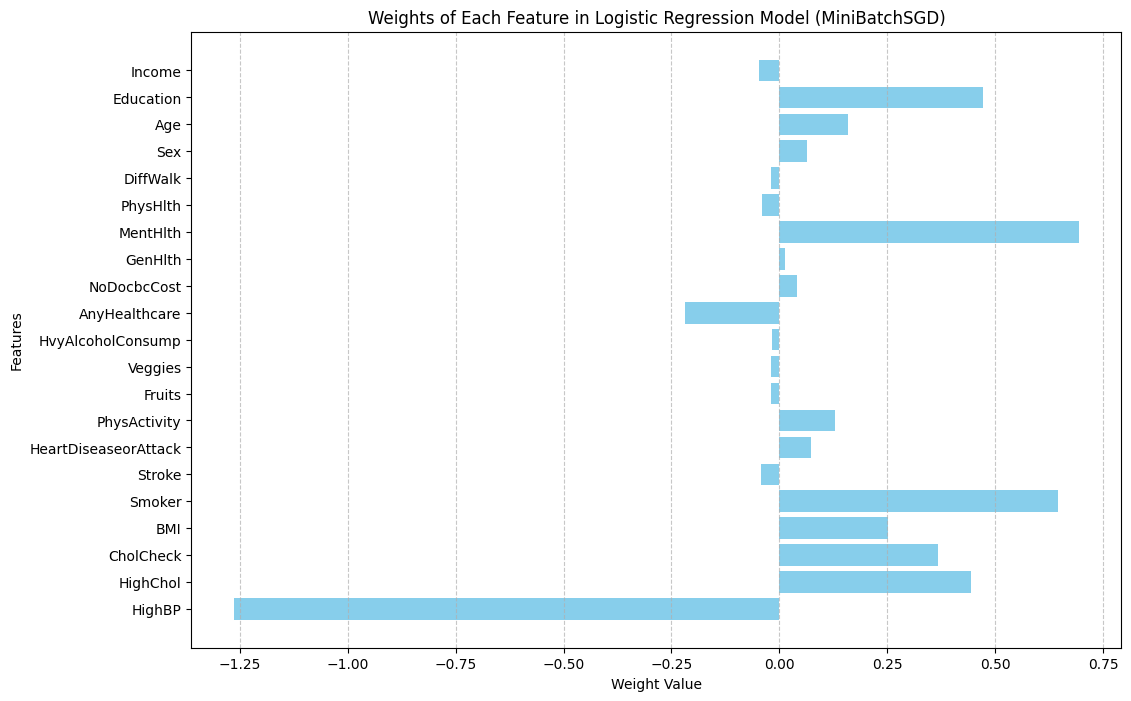

In [306]:
title = 'Weights of Each Feature in Logistic Regression Model (MiniBatchSGD)'
pj.w_plot(feature_names_log, w_log_miniBatch, title)

* **weights: using full batch**

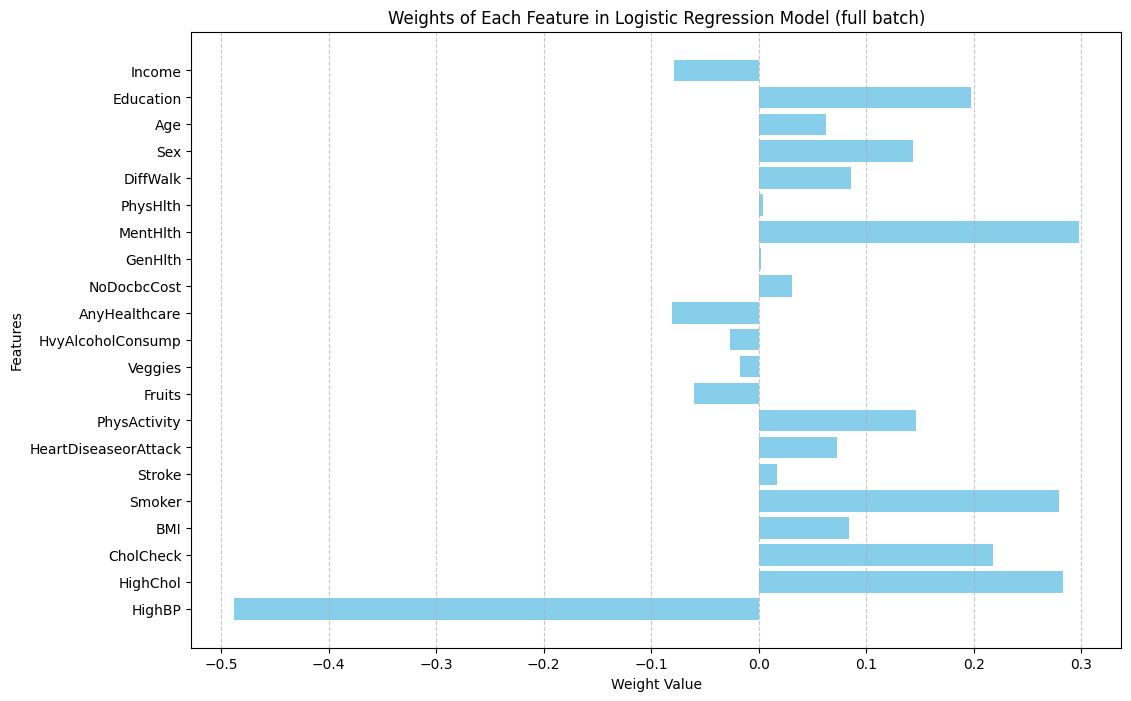

In [307]:
title = 'Weights of Each Feature in Logistic Regression Model (full batch)'
pj.w_plot(feature_names_log, w_log_full, title)

* ## *Task 3.3: how does training set size affects the performance*

* **performance(accuracy, precision, recall, F1-scores): using miniBatchSGD**

In [308]:
# mini batch
split_ratio = [20,30,40,50,60,70,80]
batch_sizes = [16]
tr_mse_mini, tr_acc_mini, tr_pre_mini, tr_recall_mini, tr_f1_mini, tst_mse_mini, tst_acc_mini, tst_pre_mini, tst_recall_mini, tst_f1_mini, grad_norm_hist_mini = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log, batch_sizes, class_label, linear=False)

miniBatchSGD completed in 9.828 seconds.
Iterations: 449700, Batch size: 16
Train set:
accuracy: 0.7647, precision: ['0.8009', '0.7052'], recall: ['0.8168', '0.6835'], f1-score: ['0.8088', '0.6942'], 
Test set:
accuracy: 0.7644, precision: ['0.7986', '0.7085'], recall: ['0.8178', '0.6822'], f1-score: ['0.8081', '0.6951']
miniBatchSGD completed in 14.769 seconds.
Iterations: 674500, Batch size: 16
Train set:
accuracy: 0.7671, precision: ['0.8063', '0.7055'], recall: ['0.8116', '0.6982'], f1-score: ['0.8090', '0.7018'], 
Test set:
accuracy: 0.7673, precision: ['0.8057', '0.7068'], recall: ['0.8124', '0.6977'], f1-score: ['0.8090', '0.7022']
miniBatchSGD completed in 19.533 seconds.
Iterations: 899300, Batch size: 16
Train set:
accuracy: 0.7666, precision: ['0.8052', '0.7058'], recall: ['0.8121', '0.6963'], f1-score: ['0.8086', '0.7010'], 
Test set:
accuracy: 0.7676, precision: ['0.8063', '0.7067'], recall: ['0.8121', '0.6989'], f1-score: ['0.8092', '0.7028']
miniBatchSGD completed in 26.

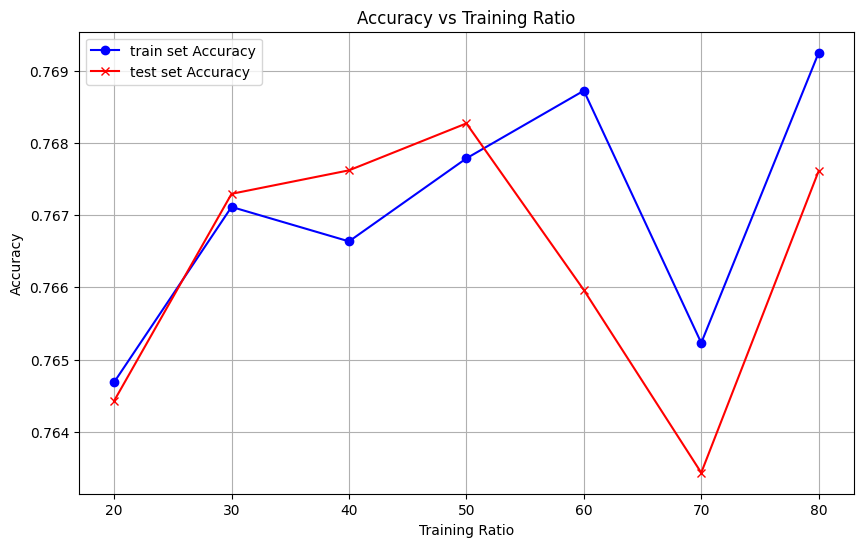

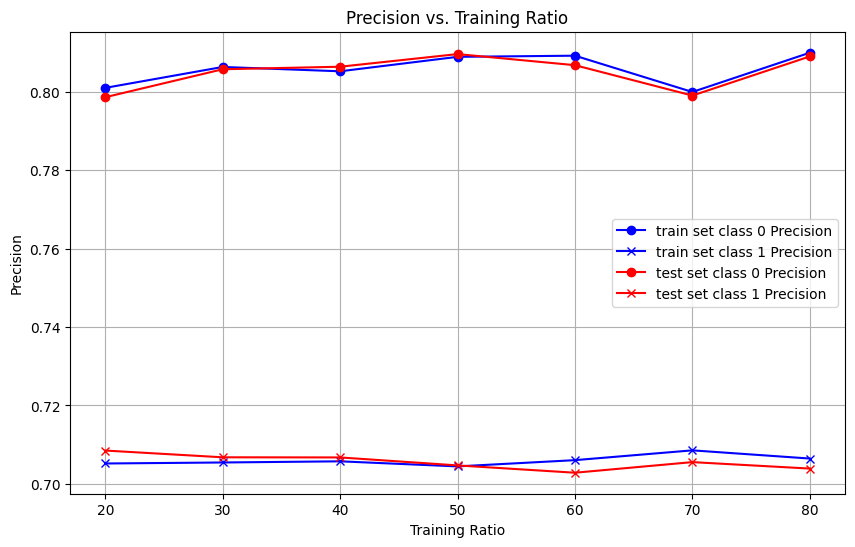

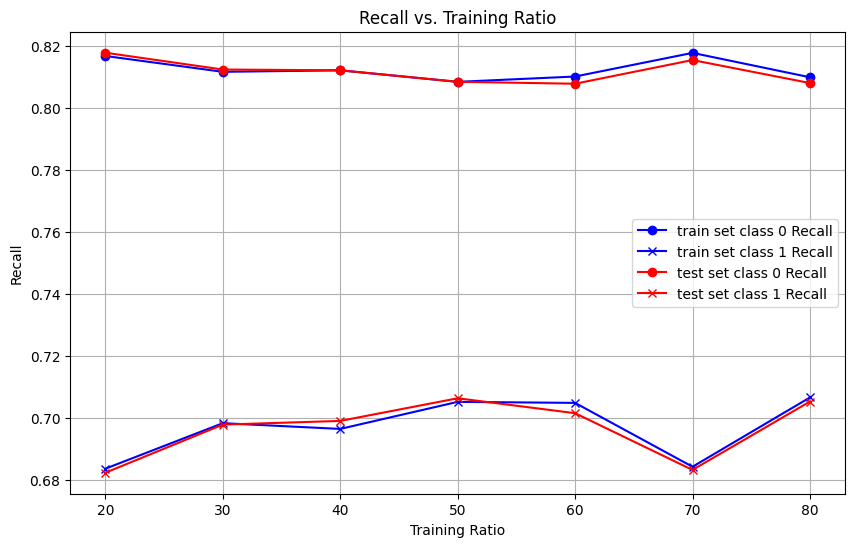

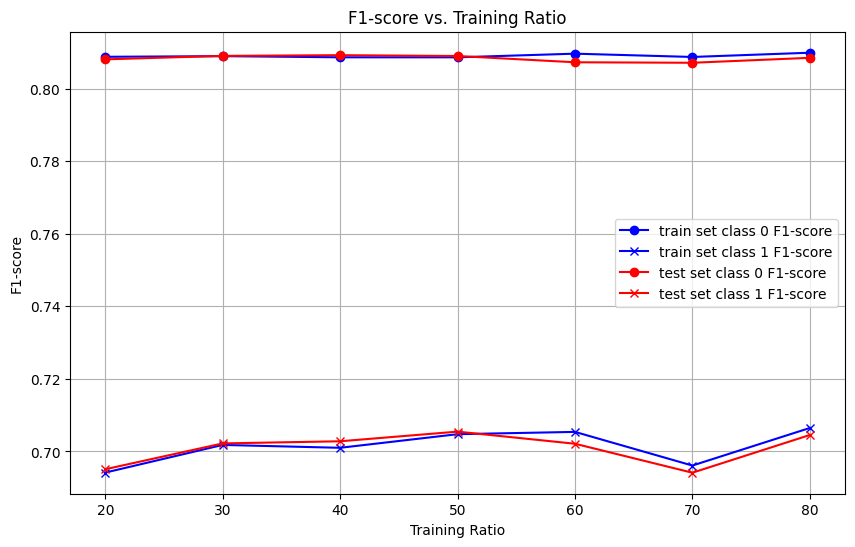

In [309]:
# plot
x_name = 'Training Ratio'
label = 'Accuracy'
pj.size_plot(split_ratio, tr_acc_mini, tst_acc_mini, label, x_name)

label = 'Precision'
plot_multi_curve_perform(split_ratio, tr_pre_mini, tst_pre_mini, label, x_name)

label = 'Recall'
plot_multi_curve_perform(split_ratio, tr_recall_mini, tst_recall_mini, label, x_name)

label = 'F1-score'
plot_multi_curve_perform(split_ratio, tr_f1_mini, tst_f1_mini, label, x_name)



* **performance(accuracy, precision, recall, F1-scores): using full batch**

In [310]:
# full batch
tr_mse_full_p, tr_acc_full_p, tr_pre_full_p, tr_recall_full_p, tr_f1_full_p, tst_mse_full_p, tst_acc_full_p, tst_pre_full_p, tst_recall_full_p, tst_f1_full_p, grad_norm_hist_full_p = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log2, batch_sizes, class_label, linear=False)

full batch completed in 5.933 seconds.
Iterations: 500
Train set:
accuracy: 0.7734, precision: ['0.8538', '0.6787'], recall: ['0.7578', '0.7977'], f1-score: ['0.8030', '0.7334'], 
Test set:
accuracy: 0.7728, precision: ['0.8505', '0.6813'], recall: ['0.7587', '0.7946'], f1-score: ['0.8020', '0.7336']
full batch completed in 9.337 seconds.
Iterations: 500
Train set:
accuracy: 0.7729, precision: ['0.8538', '0.6789'], recall: ['0.7556', '0.7997'], f1-score: ['0.8017', '0.7344'], 
Test set:
accuracy: 0.7730, precision: ['0.8518', '0.6807'], recall: ['0.7577', '0.7966'], f1-score: ['0.8020', '0.7341']
full batch completed in 16.323 seconds.
Iterations: 500
Train set:
accuracy: 0.7724, precision: ['0.8529', '0.6787'], recall: ['0.7554', '0.7986'], f1-score: ['0.8012', '0.7338'], 
Test set:
accuracy: 0.7733, precision: ['0.8527', '0.6805'], recall: ['0.7572', '0.7981'], f1-score: ['0.8021', '0.7346']
full batch completed in 25.09 seconds.
Iterations: 500
Train set:
accuracy: 0.7727, precision

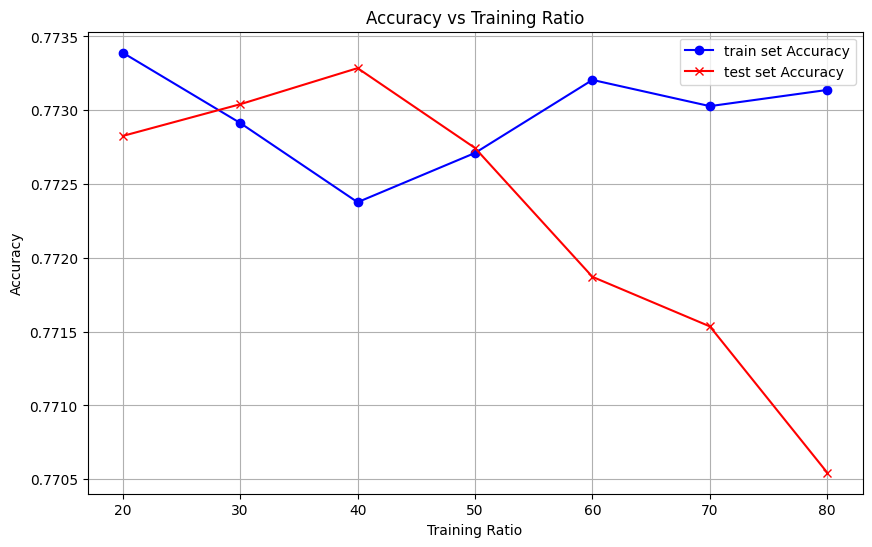

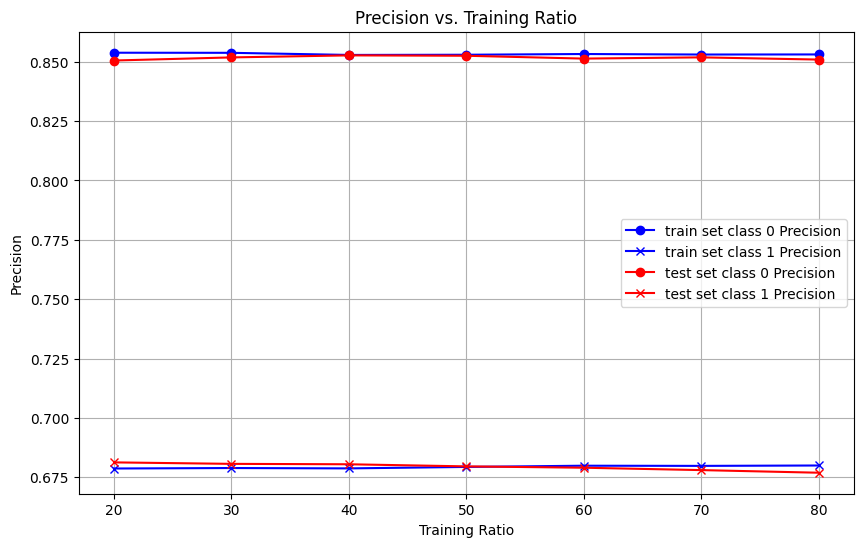

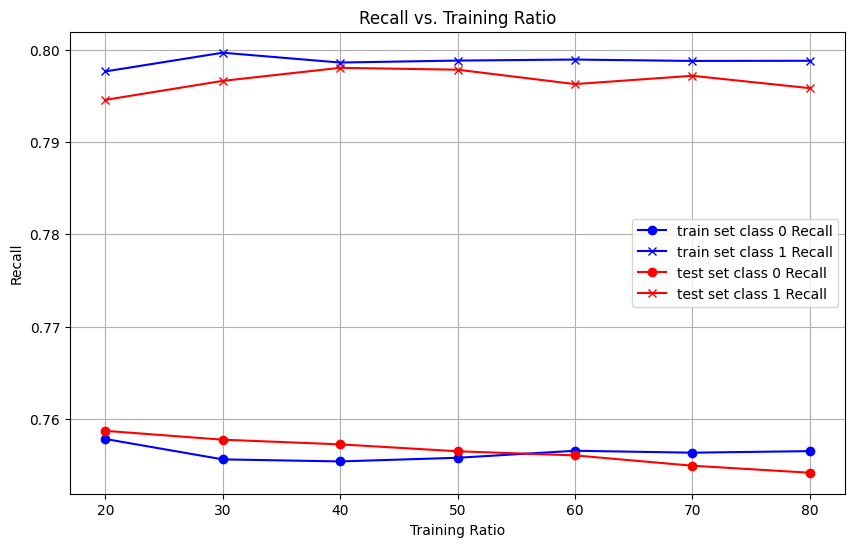

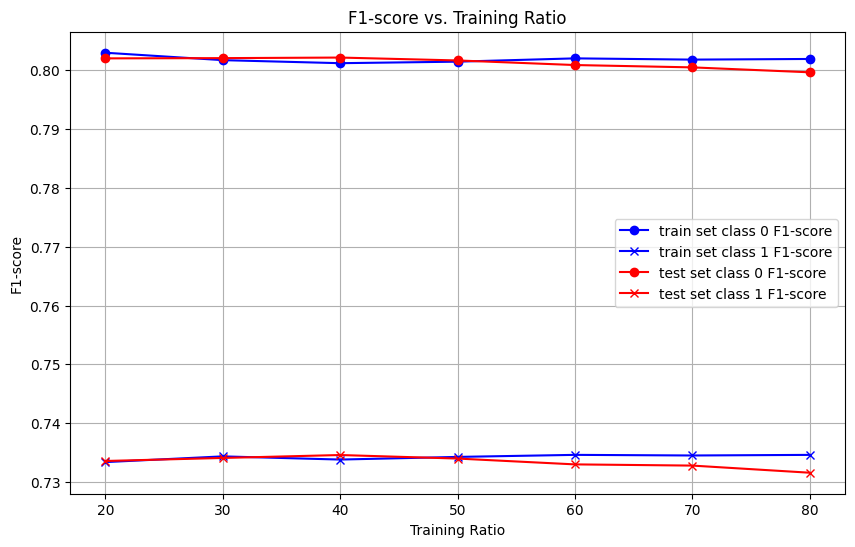

In [311]:
label = 'Accuracy'
pj.size_plot(split_ratio, tr_acc_full_p, tst_acc_full_p, label, x_name)

label = 'Precision'
plot_multi_curve_perform(split_ratio, tr_pre_full_p, tst_pre_full_p, label, x_name)

label = 'Recall'
plot_multi_curve_perform(split_ratio, tr_recall_full_p, tst_recall_full_p, label, x_name)

label = 'F1-score'
plot_multi_curve_perform(split_ratio, tr_f1_full_p, tst_f1_full_p, label, x_name)

* ## *Task 3.4: how does batch size affects the performance*
    *(convergence speed and peformance)*

In [334]:
# mini batch
split_ratio = [80]
batch_sizes = [8, 256, 1024, 2048, 4096, 65536, 131072, 253680]
logistic_model_log.time_hist.clear()
tr_mse_miniLog_bs, tr_acc_miniLog_bs, tr_pre_miniLog_bs, tr_recall_miniLog_bs, tr_f1_miniLog_bs, tst_mse_miniLog_bs, tst_acc_miniLog_bs, tst_pre_miniLog_bs, tst_recall_miniLog_bs, tst_f1_miniLog_bs, grad_norm_hist_miniLog_bs = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log, batch_sizes, class_label, linear=False)

miniBatchSGD completed in 69.923 seconds.
Iterations: 3597200, Batch size: 8
Train set:
accuracy: 0.7692, precision: ['0.8098', '0.7065'], recall: ['0.8100', '0.7063'], f1-score: ['0.8099', '0.7064'], 
Test set:
accuracy: 0.7678, precision: ['0.8094', '0.7038'], recall: ['0.8077', '0.7061'], f1-score: ['0.8085', '0.7050']
miniBatchSGD completed in 6.866 seconds.
Iterations: 112500, Batch size: 256
Train set:
accuracy: 0.7677, precision: ['0.8059', '0.7074'], recall: ['0.8131', '0.6976'], f1-score: ['0.8095', '0.7025'], 
Test set:
accuracy: 0.7659, precision: ['0.8051', '0.7042'], recall: ['0.8105', '0.6969'], f1-score: ['0.8078', '0.7005']
miniBatchSGD completed in 5.092 seconds.
Iterations: 28200, Batch size: 1024
Train set:
accuracy: 0.7676, precision: ['0.8056', '0.7074'], recall: ['0.8133', '0.6969'], f1-score: ['0.8094', '0.7021'], 
Test set:
accuracy: 0.7657, precision: ['0.8048', '0.7042'], recall: ['0.8107', '0.6961'], f1-score: ['0.8077', '0.7001']
miniBatchSGD completed in 5.

* **Convergence Speed: Observe changes in training time**

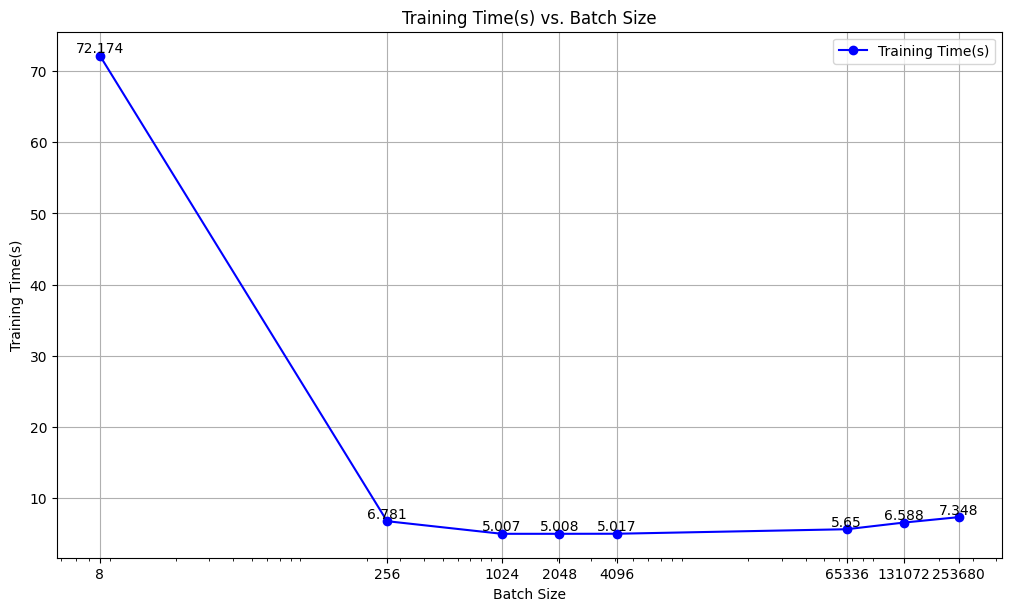

In [314]:
x_label = ['8', '256', '1024', '2048', '4096', '65336', '131072', '253680']
plot_curve_perform(batch_sizes, logistic_model_log.time_hist, x_label, 'Training Time(s)', 'Batch Size', x_range1=10, x_range2=6)

* **Batch size vs. Performance (accuracy, loss, precision, recall, F1-score)**

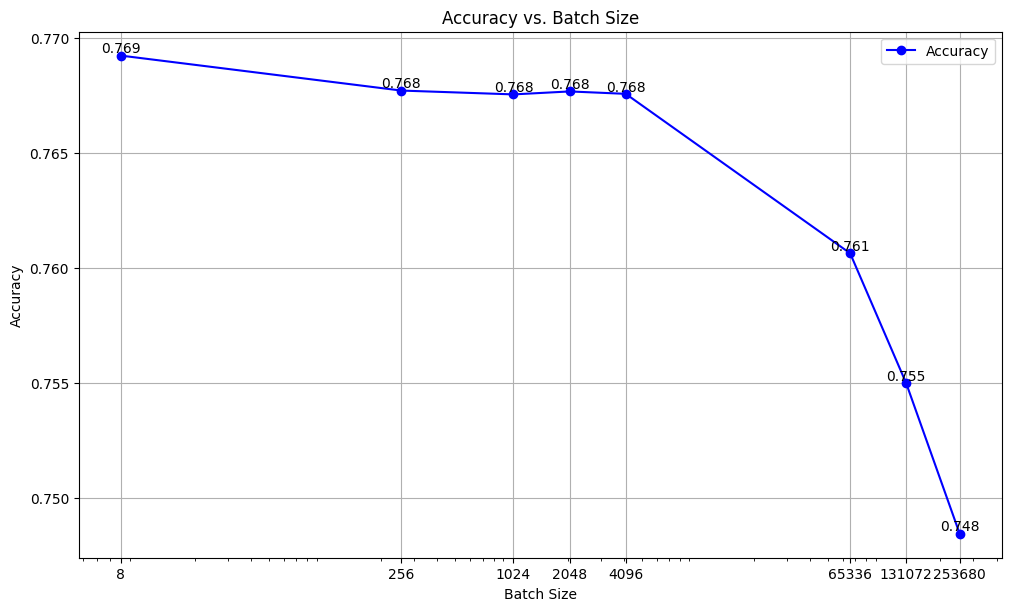

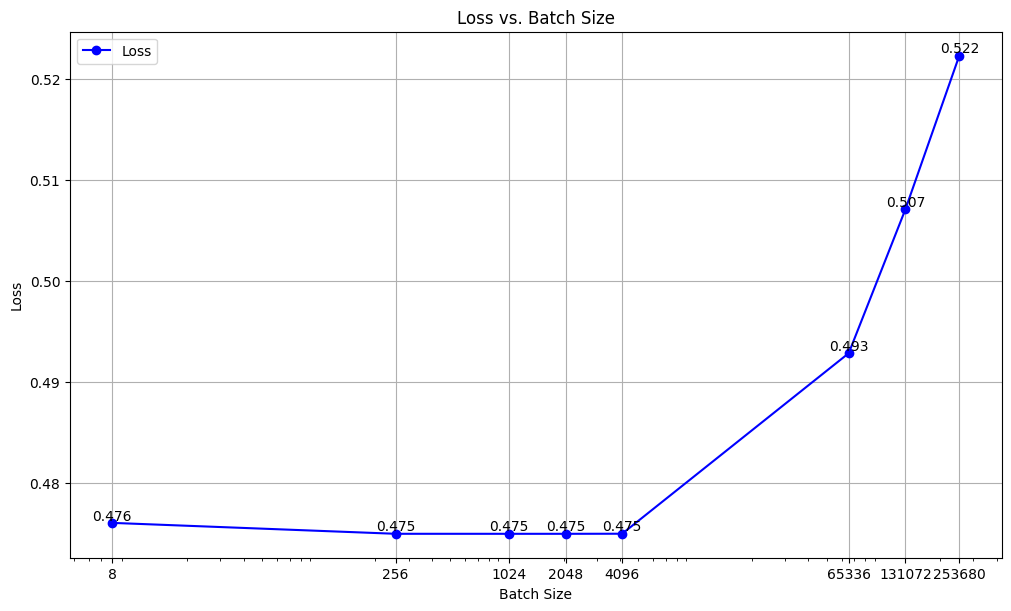

In [315]:
plot_curve_perform(batch_sizes, tr_acc_miniLog_bs, x_label, 'Accuracy', 'Batch Size', x_range1=10, x_range2=6)
plot_curve_perform(batch_sizes, tr_mse_miniLog_bs, x_label, 'Loss', 'Batch Size', x_range1=10, x_range2=6)


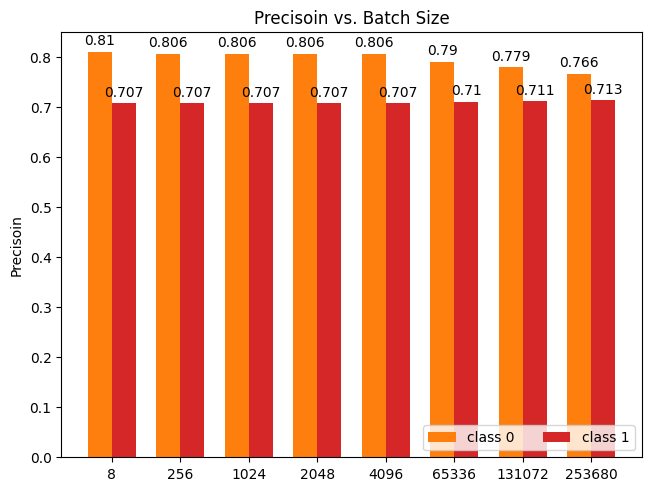

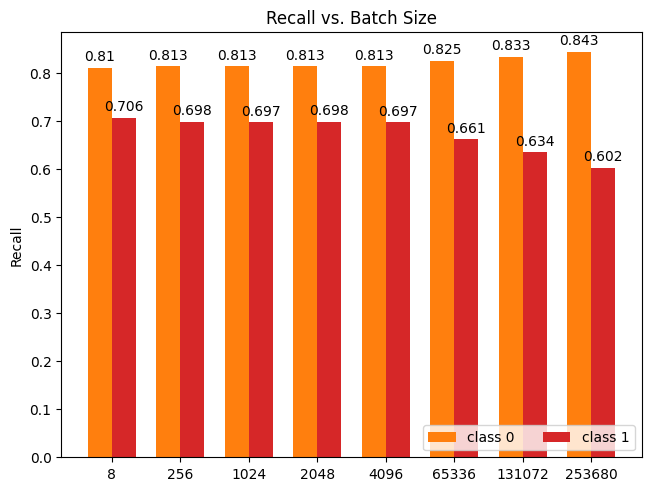

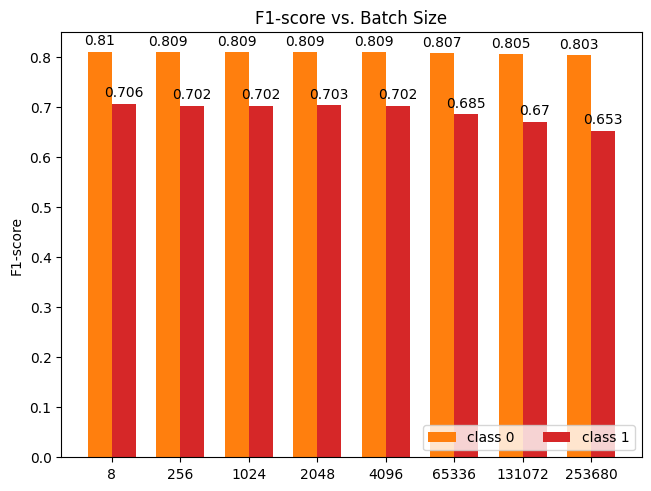

In [316]:
y_name, y_label = "Precisoin", "Precisoin"
class_label = ['class 0','class 1']
plot_bar_perform(tr_pre_miniLog_bs, x_label, 'Batch Size', y_label, y_name, class_label, leg_loc='lower right')

y_name, y_label = "Recall", "Recall"
plot_bar_perform(tr_recall_miniLog_bs, x_label, 'Batch Size', y_label, y_name, class_label, leg_loc='lower right')

y_name, y_label = "F1-score", "F1-score"
plot_bar_perform(tr_f1_miniLog_bs, x_label, 'Batch Size', y_label, y_name, class_label, leg_loc='lower right')

* ## *Task 3.5: model's performance with differnt learning rate*

* **using miniBatchSGD**

* **learning rate = 1e-1**

In [5]:
# miniBatchSGD
logistic_model_log_mini1 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=50,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
# mini batch
split_ratio = [80]
batch_sizes = [16]
class_label = [0,1]
tr_mse_mini1, tr_acc_mini1, tr_pre_mini1, tr_recall_mini1, tr_f1_mini1, tst_mse_mini1, tst_acc_mini1, tst_pre_mini1, tst_recall_mini1, tst_f1_mini1, grad_norm_hist_mini1 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_mini1, batch_sizes, class_label, linear=False)


miniBatchSGD completed in 18.761 seconds.
Iterations: 899300, Batch size: 16
Train set:
accuracy: 0.7694, precision: ['0.8189', '0.6981'], recall: ['0.7960', '0.7282'], f1-score: ['0.8073', '0.7128'], 
Test set:
accuracy: 0.7671, precision: ['0.8183', '0.6942'], recall: ['0.7924', '0.7281'], f1-score: ['0.8051', '0.7107']


In [6]:
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tr_mse_mini1]}')
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tst_mse_mini1]}')

Train Set loss: ['0.4802568357603129167721078829345060512423515319824218750000000000']
Train Set loss: ['0.4822482967234367201569966709939762949943542480468750000000000000']


* **learning rate = 1e-2**

In [12]:
# miniBatchSGD
logistic_model_log_mini2 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=50,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
# mini batch
tr_mse_mini2, tr_acc_mini2, tr_pre_mini2, tr_recall_mini2, tr_f1_mini2, tst_mse_mini2, tst_acc_mini2, tst_pre_mini2, tst_recall_mini2, tst_f1_mini2, grad_norm_hist_mini2 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_mini2, batch_sizes, class_label, linear=False)

miniBatchSGD completed in 18.14 seconds.
Iterations: 899300, Batch size: 16
Train set:
accuracy: 0.7681, precision: ['0.8090', '0.7049'], recall: ['0.8088', '0.7051'], f1-score: ['0.8089', '0.7050'], 
Test set:
accuracy: 0.7656, precision: ['0.8082', '0.7004'], recall: ['0.8049', '0.7048'], f1-score: ['0.8065', '0.7026']


In [13]:
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tr_mse_mini2]}')
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tst_mse_mini2]}')

Train Set loss: ['0.4760595718415312482818535499973222613334655761718750000000000000']
Train Set loss: ['0.4779041478725687963624579879251541569828987121582031250000000000']


* **learning rate = 1e-3**

In [9]:
# miniBatchSGD
logistic_model_log_mini3 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=50,
    lr=1e-3,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=True,
)
# mini batch
tr_mse_mini3, tr_acc_mini3, tr_pre_mini3, tr_recall_mini3, tr_f1_mini3, tst_mse_mini3, tst_acc_mini3, tst_pre_mini3, tst_recall_mini3, tst_f1_mini3, grad_norm_hist_mini3 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_mini3, batch_sizes, class_label, linear=False)

miniBatchSGD completed in 18.868 seconds.
Iterations: 899300, Batch size: 16
Train set:
accuracy: 0.7673, precision: ['0.8054', '0.7070'], recall: ['0.8130', '0.6967'], f1-score: ['0.8092', '0.7018'], 
Test set:
accuracy: 0.7659, precision: ['0.8056', '0.7038'], recall: ['0.8099', '0.6980'], f1-score: ['0.8077', '0.7009']


In [10]:
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tr_mse_mini3]}')
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tst_mse_mini3]}')

Train Set loss: ['0.4756188993278130938691106166515965014696121215820312500000000000']
Train Set loss: ['0.4771666839821354644257667132478673011064529418945312500000000000']


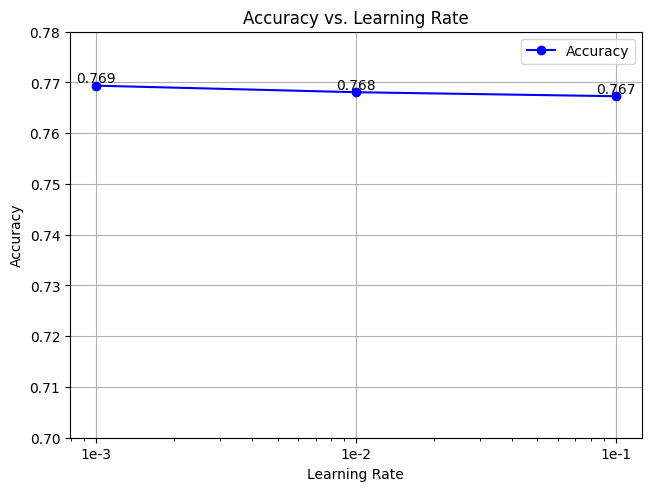

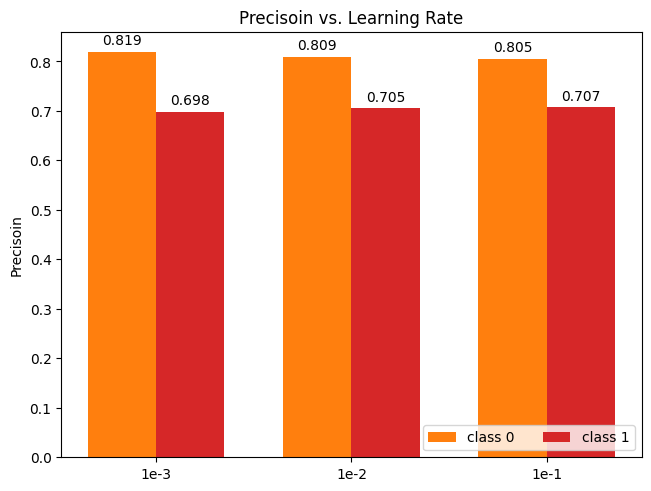

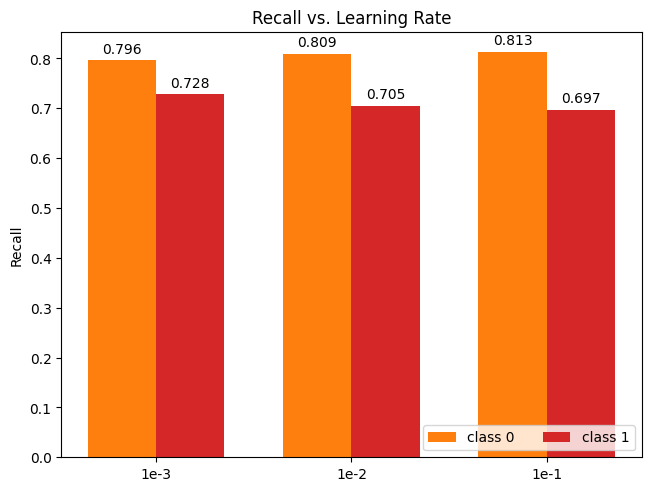

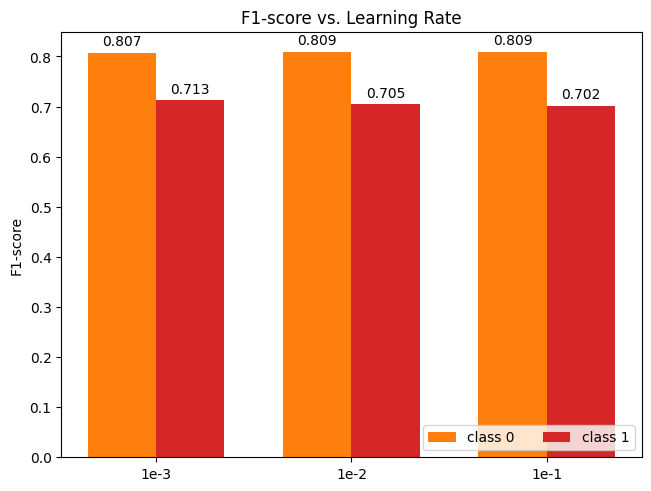

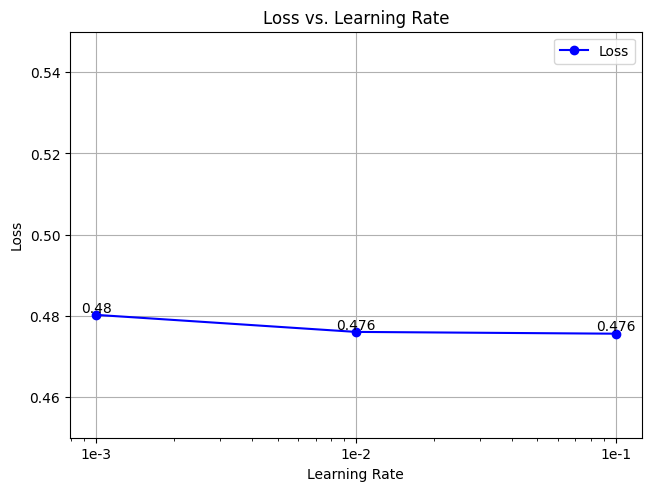

In [14]:
x_label = ["1e-3", "1e-2", "1e-1"]
x_values = [1e-3, 1e-2, 1e-1]
x_name = "Learning Rate"
class_lable = ["class 0", "class 1"]

y_label = "Accuracy"
tr_acc_logMini_lr = [tr_acc_mini1[0], tr_acc_mini2[0], tr_acc_mini3[0]]
plot_curve_perform(x_values, tr_acc_logMini_lr, x_label, y_label, x_name, 0.7, 0.78)

y_name, y_label = "Precisoin", "Precisoin"
tr_pre_logMini_lr = [tr_pre_mini1[0], tr_pre_mini2[0], tr_pre_mini3[0]]
plot_bar_perform(tr_pre_logMini_lr, x_label, x_name, y_label, y_name, class_lable, leg_loc='lower right')

y_name, y_label = "Recall", "Recall"
tr_recall_logMini_lr = [tr_recall_mini1[0], tr_recall_mini2[0], tr_recall_mini3[0]]
plot_bar_perform(tr_recall_logMini_lr, x_label, x_name, y_label, y_name, class_lable, leg_loc='lower right')

y_name, y_label = "F1-score", "F1-score"
tr_f1_logMini_lr = [tr_f1_mini1[0], tr_f1_mini2[0], tr_f1_mini3[0]]
plot_bar_perform(tr_f1_logMini_lr, x_label,x_name, y_label, y_name, class_lable, leg_loc='lower right')

y_label = "Loss"
tr_mse_logMini_lr = [tr_mse_mini1[0], tr_mse_mini2[0], tr_mse_mini3[0]]
plot_curve_perform(x_values, tr_mse_logMini_lr, x_label, y_label, x_name, 0.45, 0.55)

* **using full batch**


* **learning rate = 1e-1**

In [6]:
logistic_model_log_full1 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=100,
    lr=1e-1,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=False,
)
split_ratio = [80]
batch_sizes = [253680]
class_label = [0,1]
tr_mse_full1, tr_acc_full1, tr_pre_full1, tr_recall_full1, tr_f1_full1, tst_mse_full1, tst_acc_full1, tst_pre_full1, tst_recall_full1, tst_f1_full1, grad_norm_hist_full1 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_full1, batch_sizes, class_label, linear=False)


full batch completed in 7.935 seconds.
Iterations: 100
Train set:
accuracy: 0.7725, precision: ['0.8291', '0.6955'], recall: ['0.7875', '0.7494'], f1-score: ['0.8078', '0.7215'], 
Test set:
accuracy: 0.7695, precision: ['0.8269', '0.6916'], recall: ['0.7846', '0.7462'], f1-score: ['0.8052', '0.7178']


In [7]:
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tr_mse_full1]}')
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tst_mse_full1]}')

Train Set loss: ['0.4906681212114533674473193514131708070635795593261718750000000000']
Train Set loss: ['0.4937286987677916294536828445416176691651344299316406250000000000']


* **learning rate = 1e-2**

In [8]:
logistic_model_log_full2 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=100,
    lr=1e-2,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=False,
)
tr_mse_full2, tr_acc_full2, tr_pre_full2, tr_recall_full2, tr_f1_full2, tst_mse_full2, tst_acc_full2, tst_pre_full2, tst_recall_full2, tst_f1_full2, grad_norm_hist_full2 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_full2, batch_sizes, class_label, linear=False)


full batch completed in 10.75 seconds.
Iterations: 100
Train set:
accuracy: 0.7631, precision: ['0.8871', '0.6496'], recall: ['0.6987', '0.8626'], f1-score: ['0.7817', '0.7411'], 
Test set:
accuracy: 0.7607, precision: ['0.8852', '0.6470'], recall: ['0.6961', '0.8605'], f1-score: ['0.7794', '0.7386']


In [9]:
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tr_mse_full1]}')
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tst_mse_full1]}')

Train Set loss: ['0.4906681212114533674473193514131708070635795593261718750000000000']
Train Set loss: ['0.4937286987677916294536828445416176691651344299316406250000000000']


* **learning rate = 1e-3**

In [10]:
logistic_model_log_full3 = pj.LogisticRegression(
    boundary=0.5,
    num_epochs=100,
    lr=1e-3,  # Adjusted learning rate
    lr_decay=0,
    momentum=0.5,
    use_miniBatch=False,
)
tr_mse_full3, tr_acc_full3, tr_pre_full3, tr_recall_full3, tr_f1_full3, tst_mse_full3, tst_acc_full3, tst_pre_full3, tst_recall_full3, tst_f1_full3, grad_norm_hist_full3 = pj.size_vs_performance(X_scaled_log, y_log, split_ratio, logistic_model_log_full3, batch_sizes, class_label, linear=False)


full batch completed in 10.436 seconds.
Iterations: 100
Train set:
accuracy: 0.7497, precision: ['0.8994', '0.6289'], recall: ['0.6615', '0.8858'], f1-score: ['0.7624', '0.7356'], 
Test set:
accuracy: 0.7477, precision: ['0.8974', '0.6271'], recall: ['0.6599', '0.8834'], f1-score: ['0.7606', '0.7335']


In [11]:
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tr_mse_full1]}')
print(f'Train Set loss: {[f"{mse:.64f}" for mse in tst_mse_full1]}')

Train Set loss: ['0.4906681212114533674473193514131708070635795593261718750000000000']
Train Set loss: ['0.4937286987677916294536828445416176691651344299316406250000000000']


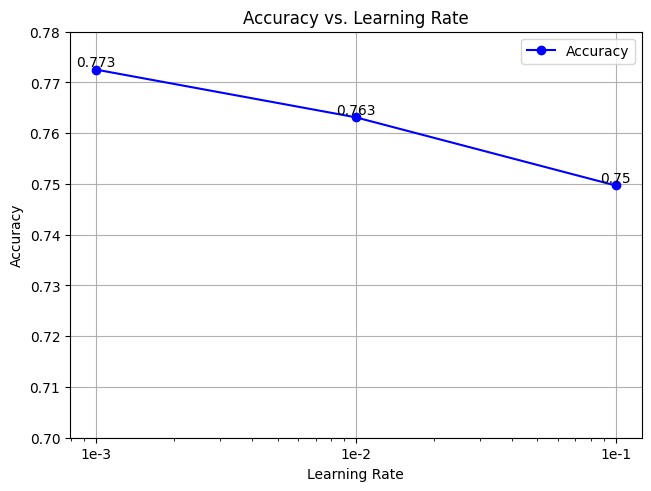

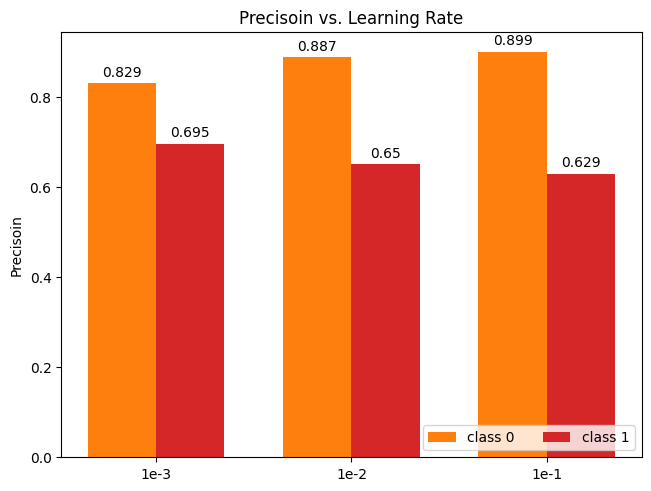

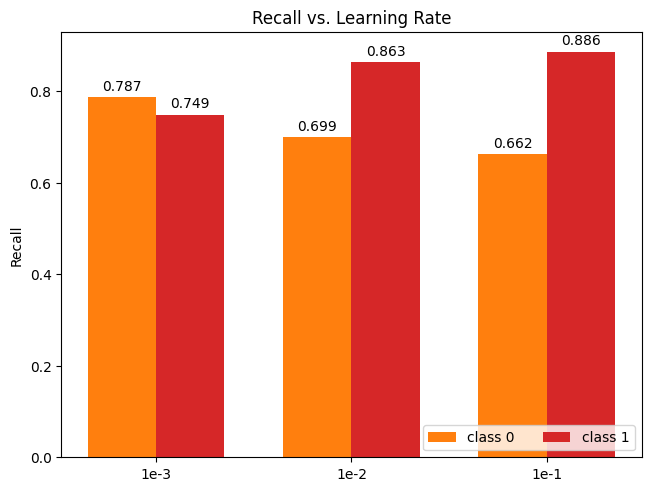

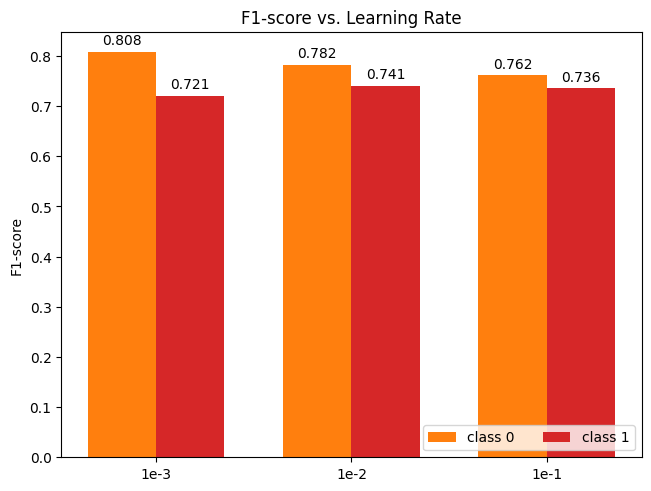

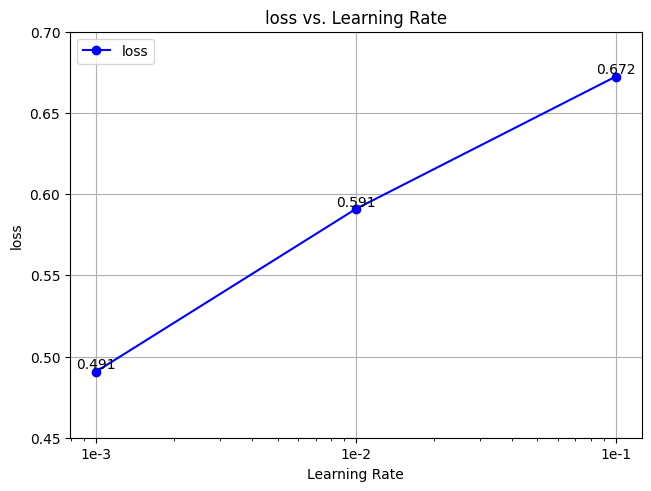

In [12]:
x_label = ["1e-3", "1e-2", "1e-1"]
x_values = [1e-3, 1e-2, 1e-1]
x_name = "Learning Rate"
class_lable = ["class 0", "class 1"]

y_label = "Accuracy"
tr_acc_logFull_lr = [tr_acc_full1[0], tr_acc_full2[0], tr_acc_full3[0]]
plot_curve_perform(x_values, tr_acc_logFull_lr, x_label, y_label, x_name, 0.7, 0.78)

y_name, y_label = "Precisoin", "Precisoin"
tr_pre_logFull_lr = [tr_pre_full1[0], tr_pre_full2[0], tr_pre_full3[0]]
plot_bar_perform(tr_pre_logFull_lr, x_label, x_name, y_label, y_name, class_lable, leg_loc='lower right')

y_name, y_label = "Recall", "Recall"
tr_recall_logFull_lr = [tr_recall_full1[0], tr_recall_full2[0], tr_recall_full3[0]]
plot_bar_perform(tr_recall_logFull_lr, x_label,x_name, y_label, y_name, class_lable, leg_loc='lower right')

y_name, y_label = "F1-score", "F1-score"
tr_f1_logFull_lr = [tr_f1_full1[0], tr_f1_full2[0], tr_f1_full3[0]]
plot_bar_perform(tr_f1_logFull_lr, x_label,x_name, y_label, y_name, class_lable, leg_loc='lower right')

y_label = "loss"
tr_mse_logFull_lr = [tr_mse_full1[0], tr_mse_full2[0], tr_mse_full3[0]]
plot_curve_perform(x_values, tr_mse_logFull_lr, x_label, y_label, x_name, 0.45, 0.7)